In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, adjusted_rand_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ipywidgets import FloatProgress
from IPython.display import display
%matplotlib inline

In [2]:
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Observed AUC')
    ax.set_ylabel('Predicted AUC')
    ax.set_title('')

In [3]:
def print_stats(true,predictions):
    print('Coefficient of determination R^2: {}'.format(r2_score(true, predictions)))
    print('Mean squared error:               {}'.format(mean_squared_error(true, predictions)))
    print('Mean absolute error:              {}'.format(mean_absolute_error(true, predictions)))
    print('Root mean squared error:          {}'.format(np.sqrt(mean_squared_error(true, predictions))))
    print('Correlation Coefficient:          {}'.format(np.corrcoef(true, predictions)[0][1]))

In [4]:
def get_best_settings(results_1,results_2):
    best_result_1 = results_1[0][0][0]
    best_result_2 = results_2[0][0][0]
    best_difference = results_2[0][0][0] - results_1[0][0][0]

    best_i_1=0
    best_j_1=0
    best_k_1=0

    best_i_2=0
    best_j_2=0
    best_k_2=0

    best_i_3=0
    best_j_3=0
    best_k_3=0
    

    mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
    md = [5,7,10,12,15,18,20]
    n_est = [10,20,30,40,50,60,80,90,100,120,140,160]
    
    for i in range(len(mxf)):
        for j in range(len(md)):
            for k in range(len(n_est)):
                if best_result_1 < results_1[i][j][k]:
                    best_result_1 = results_1[i][j][k]
                    best_i_1=i
                    best_j_1=j
                    best_k_1=k
                if best_result_2 < results_2[i][j][k]:
                    best_result_2 = results_2[i][j][k]
                    best_i_2=i
                    best_j_2=j
                    best_k_2=k
                if best_difference < results_2[i][j][k] - results_1[i][j][k]:
                    best_difference = results_2[i][j][k] - results_1[i][j][k]
                    best_i_3=i
                    best_j_3=j
                    best_k_3=k

#     print('{} {} {} : {}'.format(best_i_1,best_j_1,best_k_1,best_result_1))
#     print('{} {} {} : {}'.format(best_i_2,best_j_2,best_k_2,best_result_2))
#     print('{} {} {} : {}'.format(best_i_3,best_j_3,best_k_3,best_difference))

    print('Normal best: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_result_1,mxf[best_i_1],md[best_j_1],n_est[best_k_1]))
    print('Extended best: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_result_2,mxf[best_i_2],md[best_j_2],n_est[best_k_2]))
    print('Best difference: {} | max_features: {}; max_depth: {}; n_estimators: {};'.format(best_difference,mxf[best_i_3],md[best_j_3],n_est[best_k_3]))
    
    return mxf[best_i_1],md[best_j_1],n_est[best_k_1],mxf[best_i_2],md[best_j_2],n_est[best_k_2]

In [5]:
data_path = os.path.join(os.getcwd(), 'datasets', 'features.csv')
data_path_rp = os.path.join(os.getcwd(), 'datasets', 'rp_features.csv')
data_path_nrp = os.path.join(os.getcwd(), 'datasets', 'nrp_features.csv')

data_path_extended = os.path.join(os.getcwd(), 'datasets', 'extended_features.csv')
data_path_rp_extended = os.path.join(os.getcwd(), 'datasets', 'rp_extended_features.csv')
data_path_nrp_extended = os.path.join(os.getcwd(), 'datasets', 'nrp_extended_features.csv')

data_path_cut = os.path.join(os.getcwd(), 'datasets', 'features_cut.csv')
data_path_extended_cut = os.path.join(os.getcwd(), 'datasets', 'extended_features_cut.csv')

gene_features = pd.read_csv(data_path, delimiter = ',')
rp_gene_features = pd.read_csv(data_path_rp, delimiter = ',')
nrp_gene_features = pd.read_csv(data_path_nrp, delimiter = ',')

extended_features = pd.read_csv(data_path_extended, delimiter = ',')
rp_extended_features = pd.read_csv(data_path_rp_extended, delimiter = ',')
nrp_extended_features = pd.read_csv(data_path_nrp_extended, delimiter = ',')

gene_features_cut = pd.read_csv(data_path_cut, delimiter = ',')
extended_features_cut = pd.read_csv(data_path_extended_cut, delimiter = ',')

print('Number of data points: {}. Number of attributes: {}'.format(gene_features.shape[0],gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(extended_features.shape[0],extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(rp_gene_features.shape[0],rp_gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(rp_extended_features.shape[0],rp_extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(nrp_gene_features.shape[0],nrp_gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(nrp_extended_features.shape[0],nrp_extended_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(gene_features_cut.shape[0],gene_features_cut.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(extended_features_cut.shape[0],extended_features_cut.shape[1]))

Number of data points: 117. Number of attributes: 101
Number of data points: 117. Number of attributes: 106
Number of data points: 84. Number of attributes: 101
Number of data points: 84. Number of attributes: 106
Number of data points: 33. Number of attributes: 101
Number of data points: 33. Number of attributes: 106
Number of data points: 117. Number of attributes: 21
Number of data points: 117. Number of attributes: 26


In [6]:
def get_data(dataset):
    
    X = gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_cut = gene_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y = gene_features['AUC']

    X_rp = rp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    y_rp = rp_gene_features['AUC']

    X_nrp = nrp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
    y_nrp = nrp_gene_features['AUC']

    X_extended = extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    X_extended_cut = extended_features_cut.drop(['ORG', 'Gene','AUC'], axis=1)
    y_extended = extended_features['AUC']

    X_rp_extended = rp_extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    y_rp_extended = rp_extended_features['AUC']

    X_nrp_extended = nrp_extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
    y_nrp_extended = nrp_extended_features['AUC']
    
    if dataset == 'full':
        return X,y,X_extended,y_extended
    elif dataset == 'rp':
        return X_rp,y_rp,X_rp_extended,y_rp_extended
    elif dataset == 'nrp':
        return X_nrp,y_nrp,X_nrp_extended,y_nrp_extended
    elif dataset == 'cut':
        return X_cut,y,X_extended_cut,y_extended
    else:
        return None, None, None, None

In [7]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [8]:
X,y,X2,y2 = get_data('full')

lr1 = LinearRegression()
lr2 = LinearRegression()

predictions1 = cross_val_predict(lr1,X,y=y,cv=kf)
predictions2 = cross_val_predict(lr1,X2,y=y2,cv=kf)

print('Data')
print_stats(y,predictions1)
print('\n')
print('Extended Data')
print_stats(y2,predictions2)

Data
Coefficient of determination R^2: -7.218302015333855
Mean squared error:               0.428623354505183
Mean absolute error:              0.4702581683241454
Root mean squared error:          0.6546933285937646
Correlation Coefficient:          0.15630895126957536


Extended Data
Coefficient of determination R^2: -5.124905342449793
Mean squared error:               0.31944280813837916
Mean absolute error:              0.36293982808684455
Root mean squared error:          0.5651927176975825
Correlation Coefficient:          0.22134989868329735


Data
Coefficient of determination R^2: 0.3342891237125122
Mean squared error:               0.03471997358974358
Mean absolute error:              0.13582307692307694
Root mean squared error:          0.18633296431319818
Correlation Coefficient:          0.5807698782712379


Extended Data
Coefficient of determination R^2: 0.3705620264621863
Mean squared error:               0.03282816999999999
Mean absolute error:              0.13433247863247863
Root mean squared error:          0.18118545747382706
Correlation Coefficient:          0.6088365951015462


Text(0.5,1,'Random forrest regression extended features importance')

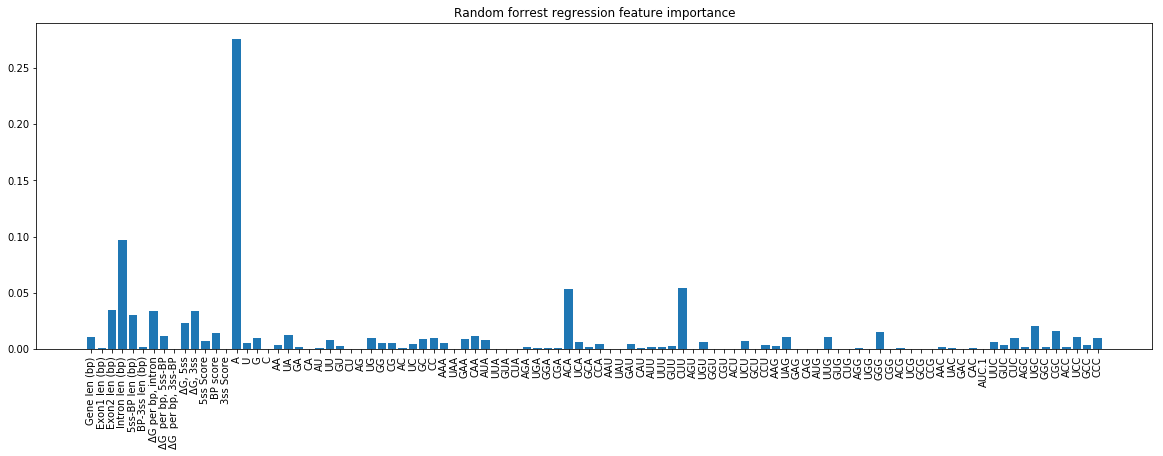

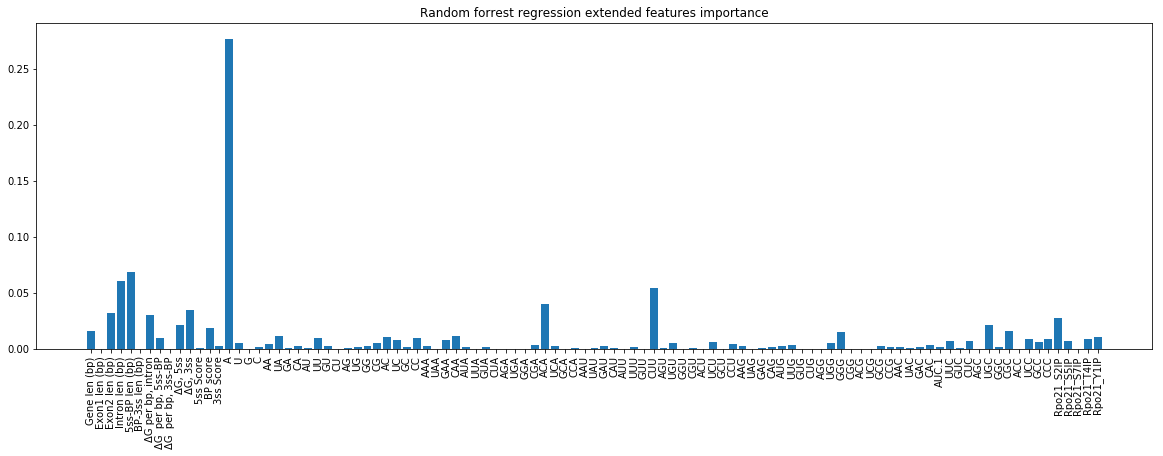

In [9]:
X,y,X2,y2 = get_data('full')

rfr1 = RandomForestRegressor(random_state=1337)
rfr2 = RandomForestRegressor(random_state=1337)

predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(rfr2,X2,y=y2,cv=kf)

print('Data')
print_stats(y,predictions_rfr1)
print('\n')
print('Extended Data')
print_stats(y2,predictions_rfr2)

rfr1.fit(X,y)
fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr1.feature_importances_))
ax1.bar(xx, rfr1.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

rfr2.fit(X2,y2)
fig2, ax2 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr2.feature_importances_))
ax2.bar(xx, rfr2.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Random forrest regression extended features importance')

In [10]:
rfr1 = RandomForestRegressor(n_estimators=500, 
                            criterion='mse', 
                            max_features=25, 
                            max_depth=20, 
                            n_jobs=2,
                            random_state=1337)

rfr2 = RandomForestRegressor(n_estimators=500, 
                            criterion='mse', 
                            max_features=25, 
                            max_depth=20, 
                            n_jobs=2,
                            random_state=1337)

predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(rfr2,X=X_extended,y=y_extended,cv=kf)

print('Data')
print_stats(y,predictions_rfr1)
print('\n')
print('Extended Data')
print_stats(y,predictions_rfr2)

rfr1.fit(X,y)
fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr1.feature_importances_))
ax1.bar(xx, rfr1.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('RF feature importance')

rfr2.fit(X_extended,y_extended)
fig2, ax2 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr2.feature_importances_))
ax2.bar(xx, rfr2.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('RF feature importance')

NameError: name 'X_extended' is not defined

# Full Set

In [11]:
def best_RFs(results1,results2,dataset):
     
    X,y,X2,y2 = get_data(dataset)
    mxf1, md1, n_est1, mxf2, md2, n_est2 = get_best_settings(results1,results2)
    
    kf = KFold(n_splits=5,shuffle=True,random_state=0)
    
    rfr1 = RandomForestRegressor(n_estimators=n_est1, 
                                criterion='mse', 
                                max_features=mxf1, 
                                max_depth=md1, 
                                n_jobs=2,
                                random_state=1337)

    rfr2 = RandomForestRegressor(n_estimators=n_est2, 
                                criterion='mse', 
                                max_features=mxf2, 
                                max_depth=md2, 
                                n_jobs=2,
                                random_state=1337)

    predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
    predictions_rfr2 = cross_val_predict(rfr2,X2,y=y2,cv=kf)

    print('Normal feature space')
    print_stats(y, predictions_rfr1)
    print('\n')
    print('Extended feature space')
    print_stats(y2, predictions_rfr2)
    print('-------------------------------------------------------\n')
         
    settings = 'max_features: {}; max_depth: {}; n_estimators: {};'.format(mxf1,md1,n_est1)
          
    rfr1.fit(X,y)
    fig, ax1 = plt.subplots(figsize=(20,6))
    xx = np.arange(len(rfr1.feature_importances_))
    ax1.bar(xx, rfr1.feature_importances_)
    ax1.set_xticks(xx)
    ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
    ax1.set_title('Normal RF: {} -- {}'.format(settings,np.corrcoef(y, predictions_rfr1)[0][1]))

    settings = 'max_features: {}; max_depth: {}; n_estimators: {};'.format(mxf2,md2,n_est2)
    rfr2.fit(X2,y2)
    fig2, ax2 = plt.subplots(figsize=(20,6))
    xx = np.arange(len(rfr2.feature_importances_))
    ax2.bar(xx, rfr2.feature_importances_)
    ax2.set_xticks(xx)
    ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
    ax2.set_title('Extended RF : {} -- {}'.format(settings,np.corrcoef(y2, predictions_rfr2)[0][1]))

In [13]:
X,y,X2,y2 = get_data('full')
print('echo')
mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

results_1_full = np.zeros((len(mxf),len(md),len(n_est)))
results_2_full = np.zeros((len(mxf),len(md),len(n_est)))

f = FloatProgress(min=0, max=(len(mxf)*len(md)*len(n_est)))
display(f)


i = 0
for max_features in mxf:
    j = 0
    for max_depth in md:
        k = 0
        for n_estimators in n_est:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = RandomForestRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            rfr2 = RandomForestRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_full[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_full[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

echo


FloatProgress(value=0.0, max=1008.0)

max_features: 5; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.32593903458010076
Mean squared error:               0.03515547026626796
Mean absolute error:              0.14173351167018933
Root mean squared error:          0.1874979206985186
Correlation Coefficient:          0.573707468406997


Extended feature space
Coefficient of determination R^2: 0.20641257829135884
Mean squared error:               0.04138934078489923
Mean absolute error:              0.1499463155600729
Root mean squared error:          0.2034437042154395
Correlation Coefficient:          0.4705488246690761
-------------------------------------------------------

max_features: 5; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3026746350605406
Mean squared error:               0.03636881883194702
Mean absolute error:              0.1448490190807868
Root mean squared error:          0.1907061059115492
Correlation Coefficient:     

max_features: 5; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3648107849588548
Mean squared error:               0.033128124470050854
Mean absolute error:              0.13703781323785985
Root mean squared error:          0.18201133060897845
Correlation Coefficient:          0.6094278253232921


Extended feature space
Coefficient of determination R^2: 0.22342889852514547
Mean squared error:               0.04050185913159281
Mean absolute error:              0.14905232081661007
Root mean squared error:          0.201250736971552
Correlation Coefficient:          0.4803583982367556
-------------------------------------------------------

max_features: 5; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3066776553351973
Mean squared error:               0.03616004237483042
Mean absolute error:              0.14232279868744283
Root mean squared error:          0.1901579406041999
Correlation Coefficient:  

max_features: 5; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3267367457764613
Mean squared error:               0.035113865851113535
Mean absolute error:              0.1395438665988008
Root mean squared error:          0.1873869415170479
Correlation Coefficient:          0.5760720118548575


Extended feature space
Coefficient of determination R^2: 0.22189361946245167
Mean squared error:               0.04058193120252979
Mean absolute error:              0.1514597050403135
Root mean squared error:          0.20144957483829493
Correlation Coefficient:          0.4794985275738052
-------------------------------------------------------

max_features: 5; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34291187277883184
Mean squared error:               0.03427025640692815
Mean absolute error:              0.139780413295142
Root mean squared error:          0.18512227420526184
Correlation Coefficient: 

max_features: 5; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.35790974916665963
Mean squared error:               0.03348804615524714
Mean absolute error:              0.13723840108441915
Root mean squared error:          0.18299739384823802
Correlation Coefficient:          0.605711082428622


Extended feature space
Coefficient of determination R^2: 0.23125835744025192
Mean squared error:               0.04009351578549869
Mean absolute error:              0.1514713527213527
Root mean squared error:          0.2002336529794597
Correlation Coefficient:          0.4889586309851751
-------------------------------------------------------

max_features: 5; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3710582829561565
Mean squared error:               0.032802287874623776
Mean absolute error:              0.13834113828810568
Root mean squared error:          0.18111401898976173
Correlation Coefficient

max_features: 5; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.36719779719265655
Mean squared error:               0.03300363048224315
Mean absolute error:              0.13954735449735448
Root mean squared error:          0.18166901354453144
Correlation Coefficient:          0.616020678895211


Extended feature space
Coefficient of determination R^2: 0.22322443271604064
Mean squared error:               0.04051252299145298
Mean absolute error:              0.14875641025641023
Root mean squared error:          0.20127722919260632
Correlation Coefficient:          0.479736316208694
-------------------------------------------------------

max_features: 5; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.37210292646074283
Mean squared error:               0.03274780477064897
Mean absolute error:              0.13765877696377699
Root mean squared error:          0.1809635454190953
Correlation Coefficient

max_features: 5; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.36759747346267657
Mean squared error:               0.03298278547274454
Mean absolute error:              0.13975595441595437
Root mean squared error:          0.1816116336382241
Correlation Coefficient:          0.615532141381733


Extended feature space
Coefficient of determination R^2: 0.21604588397585467
Mean squared error:               0.0408869182905983
Mean absolute error:              0.14949059829059827
Root mean squared error:          0.20220513913003868
Correlation Coefficient:          0.4737444390807836
-------------------------------------------------------

max_features: 5; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.37465533009679997
Mean squared error:               0.032614684838271596
Mean absolute error:              0.1373577492877493
Root mean squared error:          0.1805953621726527
Correlation Coefficient:

max_features: 5; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3649251623951606
Mean squared error:               0.033122159145299146
Mean absolute error:              0.14001196581196582
Root mean squared error:          0.18199494263659952
Correlation Coefficient:          0.6134669975877376


Extended feature space
Coefficient of determination R^2: 0.216045883975855
Mean squared error:               0.040886918290598276
Mean absolute error:              0.14949059829059824
Root mean squared error:          0.20220513913003862
Correlation Coefficient:          0.4737444390807838
-------------------------------------------------------

max_features: 5; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.37315235110336453
Mean squared error:               0.0326930723076923
Mean absolute error:              0.13748547008547007
Root mean squared error:          0.18081225707261192
Correlation Coefficien

max_features: 7; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2584293114439794
Mean squared error:               0.03867642191033394
Mean absolute error:              0.14796666900119407
Root mean squared error:          0.19666321951583612
Correlation Coefficient:          0.5106172613983176


Extended feature space
Coefficient of determination R^2: 0.33363660280434426
Mean squared error:               0.03475400564405625
Mean absolute error:              0.1431084647049492
Root mean squared error:          0.1864242624876286
Correlation Coefficient:          0.5792158616144495
-------------------------------------------------------

max_features: 7; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3237789241475587
Mean squared error:               0.03526813025101545
Mean absolute error:              0.13882965478468223
Root mean squared error:          0.1877981103499592
Correlation Coefficient:   

max_features: 7; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.29832202992979084
Mean squared error:               0.0365958277941995
Mean absolute error:              0.14507995166857612
Root mean squared error:          0.19130036015177676
Correlation Coefficient:          0.549197872384769


Extended feature space
Coefficient of determination R^2: 0.30737990155707084
Mean squared error:               0.03612341691001464
Mean absolute error:              0.14986605152505467
Root mean squared error:          0.19006161345735925
Correlation Coefficient:          0.5565819813588333
-------------------------------------------------------

max_features: 7; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3539568458734933
Mean squared error:               0.033694208774531546
Mean absolute error:              0.13701098434662712
Root mean squared error:          0.18355982342149807
Correlation Coefficient:

max_features: 7; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.25131170514645307
Mean squared error:               0.039047638772600715
Mean absolute error:              0.1478844544344544
Root mean squared error:          0.19760475392206717
Correlation Coefficient:          0.5062487579152541


Extended feature space
Coefficient of determination R^2: 0.34204040033125394
Mean squared error:               0.03431570782051002
Mean absolute error:              0.1436083587443607
Root mean squared error:          0.18524499404979888
Correlation Coefficient:          0.5861696009180788
-------------------------------------------------------

max_features: 7; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3224948884591725
Mean squared error:               0.03533509879062784
Mean absolute error:              0.14084162503925324
Root mean squared error:          0.18797632508012238
Correlation Coefficien

max_features: 7; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.26298682135351015
Mean squared error:               0.03843872619387464
Mean absolute error:              0.14750105413105408
Root mean squared error:          0.19605796641267764
Correlation Coefficient:          0.5188408741084926


Extended feature space
Coefficient of determination R^2: 0.30743809949401635
Mean squared error:               0.03612038161210124
Mean absolute error:              0.14695297383172382
Root mean squared error:          0.1900536282529256
Correlation Coefficient:          0.5562635052845787
-------------------------------------------------------

max_features: 7; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3250045712246583
Mean squared error:               0.035204206953885986
Mean absolute error:              0.14273396477098405
Root mean squared error:          0.18762784162774454
Correlation Coefficie

max_features: 7; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.25224760799607215
Mean squared error:               0.038998827008546996
Mean absolute error:              0.14977435897435895
Root mean squared error:          0.19748120672242966
Correlation Coefficient:          0.5062832803215596


Extended feature space
Coefficient of determination R^2: 0.31364466560550186
Mean squared error:               0.03579667980828586
Mean absolute error:              0.14805591168091173
Root mean squared error:          0.18920010520157185
Correlation Coefficient:          0.5613200464229348
-------------------------------------------------------

max_features: 7; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.30881535735117305
Mean squared error:               0.03604855109508547
Mean absolute error:              0.1435985042735043
Root mean squared error:          0.1898645598712026
Correlation Coefficie

max_features: 7; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.25224760799607215
Mean squared error:               0.038998827008546996
Mean absolute error:              0.14977435897435895
Root mean squared error:          0.19748120672242966
Correlation Coefficient:          0.5062832803215596


Extended feature space
Coefficient of determination R^2: 0.31446146218601645
Mean squared error:               0.03575408
Mean absolute error:              0.14834188034188037
Root mean squared error:          0.18908749297613525
Correlation Coefficient:          0.5624093335584601
-------------------------------------------------------

max_features: 7; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31025328201152624
Mean squared error:               0.03597355651709402
Mean absolute error:              0.14357307692307691
Root mean squared error:          0.1896669621127887
Correlation Coefficient:     

max_features: 7; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.25224760799607215
Mean squared error:               0.038998827008546996
Mean absolute error:              0.14977435897435895
Root mean squared error:          0.19748120672242966
Correlation Coefficient:          0.5062832803215596


Extended feature space
Coefficient of determination R^2: 0.31446146218601645
Mean squared error:               0.03575408
Mean absolute error:              0.14834188034188037
Root mean squared error:          0.18908749297613525
Correlation Coefficient:          0.5624093335584603
-------------------------------------------------------

max_features: 7; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31025328201152624
Mean squared error:               0.03597355651709402
Mean absolute error:              0.14357307692307694
Root mean squared error:          0.1896669621127887
Correlation Coefficient:     

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2600716790056544
Mean squared error:               0.03859076466723163
Mean absolute error:              0.14639841626498673
Root mean squared error:          0.19644532233482076
Correlation Coefficient:          0.5127720198207714


Extended feature space
Coefficient of determination R^2: 0.2725994449557644
Mean squared error:               0.03793738236806897
Mean absolute error:              0.1453771388099471
Root mean squared error:          0.1947752098396225
Correlation Coefficient:          0.5251836685583972
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3027528599763941
Mean squared error:               0.03636473903227837
Mean absolute error:              0.14399004701659004
Root mean squared error:          0.19069540904877172
Correlation Coefficient: 

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3390530989943411
Mean squared error:               0.034471509726737896
Mean absolute error:              0.14067505505783656
Root mean squared error:          0.18566504713256585
Correlation Coefficient:          0.5824892761158675


Extended feature space
Coefficient of determination R^2: 0.31516852435173115
Mean squared error:               0.03571720336091484
Mean absolute error:              0.14418117661476976
Root mean squared error:          0.1889899557143576
Correlation Coefficient:          0.562862345262013
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3283607557004832
Mean squared error:               0.03502916604571758
Mean absolute error:              0.14030381045750887
Root mean squared error:          0.18716080264232032
Correlation Coefficient

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31172915492624687
Mean squared error:               0.035896582757995045
Mean absolute error:              0.14195827420042048
Root mean squared error:          0.18946393524361052
Correlation Coefficient:          0.558697015980557


Extended feature space
Coefficient of determination R^2: 0.3333300569892389
Mean squared error:               0.03476999345946323
Mean absolute error:              0.1435827246242228
Root mean squared error:          0.1864671377467441
Correlation Coefficient:          0.5800575801526835
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.32753485463831156
Mean squared error:               0.03507224069582132
Mean absolute error:              0.1380682750550854
Root mean squared error:          0.18727584119640558
Correlation Coefficien

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31413748979600564
Mean squared error:               0.03577097669378351
Mean absolute error:              0.14473083690763175
Root mean squared error:          0.1891321672634867
Correlation Coefficient:          0.5622177471969596


Extended feature space
Coefficient of determination R^2: 0.33623911642749305
Mean squared error:               0.034618272238637685
Mean absolute error:              0.14257400266400266
Root mean squared error:          0.1860598619762943
Correlation Coefficient:          0.5810928182697508
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.325807401223255
Mean squared error:               0.03516233556896318
Mean absolute error:              0.14144546132429675
Root mean squared error:          0.18751622748168537
Correlation Coefficie

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3025745542326279
Mean squared error:               0.03637403852089269
Mean absolute error:              0.14591524216524215
Root mean squared error:          0.19071979058527902
Correlation Coefficient:          0.5515927997287452


Extended feature space
Coefficient of determination R^2: 0.32390070499322476
Mean squared error:               0.035261778803418804
Mean absolute error:              0.14167350427350428
Root mean squared error:          0.18778119928102174
Correlation Coefficient:          0.5697054414752605
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3344816956035992
Mean squared error:               0.03470993005401234
Mean absolute error:              0.14120719373219376
Root mean squared error:          0.18630601185687043
Correlation Coeffic

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30765852324392107
Mean squared error:               0.036108885470085464
Mean absolute error:              0.14529401709401707
Root mean squared error:          0.19002338137735963
Correlation Coefficient:          0.5563450370351176


Extended feature space
Coefficient of determination R^2: 0.30923295563892894
Mean squared error:               0.03602677136752137
Mean absolute error:              0.1428333333333333
Root mean squared error:          0.18980719524696993
Correlation Coefficient:          0.5564850506735782
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3402086004296003
Mean squared error:               0.03441124485689103
Mean absolute error:              0.14038651709401712
Root mean squared error:          0.18550268153558058
Correlation Coeffic

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30765852324392107
Mean squared error:               0.036108885470085464
Mean absolute error:              0.14529401709401707
Root mean squared error:          0.19002338137735963
Correlation Coefficient:          0.5563450370351176


Extended feature space
Coefficient of determination R^2: 0.30923295563892894
Mean squared error:               0.03602677136752137
Mean absolute error:              0.1428333333333333
Root mean squared error:          0.18980719524696993
Correlation Coefficient:          0.5564850506735785
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3353872580855368
Mean squared error:               0.03466270068376069
Mean absolute error:              0.14083162393162396
Root mean squared error:          0.18617921657306621
Correlation Coeffic

max_features: 12; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2979474699204415
Mean squared error:               0.036615362871806924
Mean absolute error:              0.14369721512600664
Root mean squared error:          0.19135141199324066
Correlation Coefficient:          0.5460253234880902


Extended feature space
Coefficient of determination R^2: 0.37126491231881886
Mean squared error:               0.03279151117520358
Mean absolute error:              0.13272985217993793
Root mean squared error:          0.18108426539929853
Correlation Coefficient:          0.6142320793715484
-------------------------------------------------------

max_features: 12; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3391691461644727
Mean squared error:               0.034465457317462866
Mean absolute error:              0.13704849375423878
Root mean squared error:          0.18564874714757132
Correlation Coeffici

max_features: 12; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.36524652669660396
Mean squared error:               0.03310539847568079
Mean absolute error:              0.13884331446698983
Root mean squared error:          0.18194888973467463
Correlation Coefficient:          0.6076754980308824


Extended feature space
Coefficient of determination R^2: 0.3665634667043901
Mean squared error:               0.03303671382004679
Mean absolute error:              0.13819159063858183
Root mean squared error:          0.1817600446194014
Correlation Coefficient:          0.6054449888127328
-------------------------------------------------------

max_features: 12; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.37025942844964
Mean squared error:               0.032843951918815124
Mean absolute error:              0.1368723368585269
Root mean squared error:          0.18122900407720371
Correlation Coefficient: 

max_features: 12; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.32294790214214775
Mean squared error:               0.035311471982551024
Mean absolute error:              0.1438636523490505
Root mean squared error:          0.18791346940161321
Correlation Coefficient:          0.5692788974078437


Extended feature space
Coefficient of determination R^2: 0.3758868871812888
Mean squared error:               0.03255045330627955
Mean absolute error:              0.1338574813282634
Root mean squared error:          0.180417441801727
Correlation Coefficient:          0.6137473510737412
-------------------------------------------------------

max_features: 12; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3417183245760119
Mean squared error:               0.034332505595811906
Mean absolute error:              0.13989314301820036
Root mean squared error:          0.18529032785283722
Correlation Coefficien

max_features: 12; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2836707334880869
Mean squared error:               0.03735996226102438
Mean absolute error:              0.1469957657347401
Root mean squared error:          0.1932872532295505
Correlation Coefficient:          0.5359054069945361


Extended feature space
Coefficient of determination R^2: 0.3844573283702878
Mean squared error:               0.03210346422688528
Mean absolute error:              0.13380136752136754
Root mean squared error:          0.17917439612535402
Correlation Coefficient:          0.6214909360798669
-------------------------------------------------------

max_features: 12; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31422694569704657
Mean squared error:               0.035766311145071276
Mean absolute error:              0.1422020271490143
Root mean squared error:          0.18911983276502567
Correlation Coefficien

max_features: 12; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.290952088088991
Mean squared error:               0.03698020514957264
Mean absolute error:              0.14521923076923077
Root mean squared error:          0.19230237946934678
Correlation Coefficient:          0.5408817652321161


Extended feature space
Coefficient of determination R^2: 0.34821015847424874
Mean squared error:               0.03399392572649572
Mean absolute error:              0.14048803418803418
Root mean squared error:          0.18437441722347414
Correlation Coefficient:          0.5910185659670498
-------------------------------------------------------

max_features: 12; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.317566856517983
Mean squared error:               0.03559211898504273
Mean absolute error:              0.141415811965812
Root mean squared error:          0.18865873683729234
Correlation Coefficient:

max_features: 12; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.28721041341224307
Mean squared error:               0.037175351196581184
Mean absolute error:              0.14562649572649566
Root mean squared error:          0.19280910558524247
Correlation Coefficient:          0.5383207539441183


Extended feature space
Coefficient of determination R^2: 0.36490294382873867
Mean squared error:               0.033123317948717944
Mean absolute error:              0.13966324786324788
Root mean squared error:          0.18199812622309589
Correlation Coefficient:          0.6052485934341615
-------------------------------------------------------

max_features: 12; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31525965861288086
Mean squared error:               0.03571245027777778
Mean absolute error:              0.14120384615384618
Root mean squared error:          0.1889773803336732
Correlation Coeff

max_features: 12; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.28721041341224285
Mean squared error:               0.0371753511965812
Mean absolute error:              0.14562649572649566
Root mean squared error:          0.19280910558524253
Correlation Coefficient:          0.5383207539441183


Extended feature space
Coefficient of determination R^2: 0.36490294382873867
Mean squared error:               0.03312331794871794
Mean absolute error:              0.13966324786324788
Root mean squared error:          0.18199812622309586
Correlation Coefficient:          0.6052485934341616
-------------------------------------------------------

max_features: 12; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31525965861288097
Mean squared error:               0.03571245027777777
Mean absolute error:              0.14120384615384615
Root mean squared error:          0.1889773803336732
Correlation Coeffici

max_features: 15; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.33426042431139724
Mean squared error:               0.034721470399371075
Mean absolute error:              0.13978646282517038
Root mean squared error:          0.18633698076165953
Correlation Coefficient:          0.5796312776266334


Extended feature space
Coefficient of determination R^2: 0.3530654440687385
Mean squared error:               0.03374069959843326
Mean absolute error:              0.13721213488421033
Root mean squared error:          0.18368641647773865
Correlation Coefficient:          0.5947734817544352
-------------------------------------------------------

max_features: 15; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3459897089088333
Mean squared error:               0.034109732682660404
Mean absolute error:              0.13814918449390504
Root mean squared error:          0.18468820396186758
Correlation Coeffici

max_features: 15; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.33043217512819734
Mean squared error:               0.0349211317167239
Mean absolute error:              0.14026824766937024
Root mean squared error:          0.1868719661070753
Correlation Coefficient:          0.5758155830736104


Extended feature space
Coefficient of determination R^2: 0.2788251681530486
Mean squared error:               0.037612681431541964
Mean absolute error:              0.13421720914224572
Root mean squared error:          0.1939398912847534
Correlation Coefficient:          0.5346243104944136
-------------------------------------------------------

max_features: 15; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34812402348524274
Mean squared error:               0.033998418073924556
Mean absolute error:              0.1395024950980401
Root mean squared error:          0.1843865994966135
Correlation Coefficient:

max_features: 15; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3341954177614894
Mean squared error:               0.034724860798681575
Mean absolute error:              0.13812190234199828
Root mean squared error:          0.18634607803407502
Correlation Coefficient:          0.5789591414386808


Extended feature space
Coefficient of determination R^2: 0.33121686038292086
Mean squared error:               0.03488020666608901
Mean absolute error:              0.13224087975010296
Root mean squared error:          0.1867624337657041
Correlation Coefficient:          0.5770783398906857
-------------------------------------------------------

max_features: 15; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34901255138141984
Mean squared error:               0.03395207713795989
Mean absolute error:              0.13709959850694156
Root mean squared error:          0.18426089421784506
Correlation Coeffic

max_features: 15; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.25450299744690064
Mean squared error:               0.038881197771957005
Mean absolute error:              0.14459656084656083
Root mean squared error:          0.19718315793179955
Correlation Coefficient:          0.5063792118859862


Extended feature space
Coefficient of determination R^2: 0.2789897347498106
Mean squared error:               0.03760409850448331
Mean absolute error:              0.13725666056166055
Root mean squared error:          0.1939177622201827
Correlation Coefficient:          0.5303053768598912
-------------------------------------------------------

max_features: 15; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3074066227596295
Mean squared error:               0.036122023272806406
Mean absolute error:              0.14125784662867993
Root mean squared error:          0.19005794714456536
Correlation Coeffic

max_features: 15; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2596419757110757
Mean squared error:               0.03861317572820513
Mean absolute error:              0.14311880341880343
Root mean squared error:          0.19650235552838832
Correlation Coefficient:          0.510221110161813


Extended feature space
Coefficient of determination R^2: 0.29761622285485734
Mean squared error:               0.036632638974358984
Mean absolute error:              0.13688205128205128
Root mean squared error:          0.1913965490137139
Correlation Coefficient:          0.5465764669105961
-------------------------------------------------------

max_features: 15; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31074311943350175
Mean squared error:               0.0359480091767094
Mean absolute error:              0.14029252136752135
Root mean squared error:          0.18959960225883757
Correlation Coefficie

max_features: 15; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.26241095516122326
Mean squared error:               0.03846876034188035
Mean absolute error:              0.14291794871794872
Root mean squared error:          0.19613454652834708
Correlation Coefficient:          0.5124331206571991


Extended feature space
Coefficient of determination R^2: 0.29306848643117256
Mean squared error:               0.036869824957264964
Mean absolute error:              0.13725641025641028
Root mean squared error:          0.1920151685603639
Correlation Coefficient:          0.5426527974667299
-------------------------------------------------------

max_features: 15; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3102664074026692
Mean squared error:               0.03597287196581197
Mean absolute error:              0.14043076923076925
Root mean squared error:          0.18966515749027804
Correlation Coeffic

max_features: 15; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.26241095516122326
Mean squared error:               0.03846876034188035
Mean absolute error:              0.14291794871794875
Root mean squared error:          0.19613454652834708
Correlation Coefficient:          0.512433120657199


Extended feature space
Coefficient of determination R^2: 0.29306848643117256
Mean squared error:               0.036869824957264964
Mean absolute error:              0.1372564102564103
Root mean squared error:          0.1920151685603639
Correlation Coefficient:          0.54265279746673
-------------------------------------------------------

max_features: 15; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3102664074026691
Mean squared error:               0.035972871965811976
Mean absolute error:              0.14043076923076922
Root mean squared error:          0.18966515749027804
Correlation Coefficien

max_features: 18; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3768521376114241
Mean squared error:               0.03250011092697416
Mean absolute error:              0.13550280390419106
Root mean squared error:          0.1802778714290086
Correlation Coefficient:          0.6150151571366859


Extended feature space
Coefficient of determination R^2: 0.30877459105401706
Mean squared error:               0.036050677250464666
Mean absolute error:              0.13856680434975452
Root mean squared error:          0.18987015892568443
Correlation Coefficient:          0.5570297690650999
-------------------------------------------------------

max_features: 18; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.36309792646784933
Mean squared error:               0.03321745814881291
Mean absolute error:              0.13594022556099272
Root mean squared error:          0.18225657230622141
Correlation Coefficie

max_features: 18; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3082485410314505
Mean squared error:               0.03607811324939599
Mean absolute error:              0.13984717455989384
Root mean squared error:          0.18994239455528614
Correlation Coefficient:          0.5609206882284268


Extended feature space
Coefficient of determination R^2: 0.25188669979059597
Mean squared error:               0.03901765007995652
Mean absolute error:              0.14718864791735342
Root mean squared error:          0.1975288588534762
Correlation Coefficient:          0.5037591127780452
-------------------------------------------------------

max_features: 18; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.347026539793692
Mean squared error:               0.034055657043788344
Mean absolute error:              0.13533191286807617
Root mean squared error:          0.1845417487827303
Correlation Coefficient:

max_features: 18; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.34027445031384773
Mean squared error:               0.03440781047370248
Mean absolute error:              0.13765350209674118
Root mean squared error:          0.18549342434087113
Correlation Coefficient:          0.5850175892282259


Extended feature space
Coefficient of determination R^2: 0.2701849134173552
Mean squared error:               0.03806331161788488
Mean absolute error:              0.14658230302172487
Root mean squared error:          0.19509821018626716
Correlation Coefficient:          0.5205049159403888
-------------------------------------------------------

max_features: 18; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.36018406641308176
Mean squared error:               0.03336942974451514
Mean absolute error:              0.1328041498266058
Root mean squared error:          0.18267301318069712
Correlation Coeffici

max_features: 18; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3024771508071479
Mean squared error:               0.036379118570627006
Mean absolute error:              0.14269485223239092
Root mean squared error:          0.19073310821833478
Correlation Coefficient:          0.5568681698099933


Extended feature space
Coefficient of determination R^2: 0.3089427051206134
Mean squared error:               0.03604190930606088
Mean absolute error:              0.14246529112862444
Root mean squared error:          0.189847068205071
Correlation Coefficient:          0.5573963470425578
-------------------------------------------------------

max_features: 18; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34551629177240273
Mean squared error:               0.0341344236274223
Mean absolute error:              0.13338656429283363
Root mean squared error:          0.18475503681205094
Correlation Coefficien

max_features: 18; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3195126080086623
Mean squared error:               0.03549063883386158
Mean absolute error:              0.14026066239316237
Root mean squared error:          0.18838959322070203
Correlation Coefficient:          0.5706879984249376


Extended feature space
Coefficient of determination R^2: 0.2927397481681153
Mean squared error:               0.03688697021388889
Mean absolute error:              0.14259995726495722
Root mean squared error:          0.19205980894994373
Correlation Coefficient:          0.5428221304790514
-------------------------------------------------------

max_features: 18; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3576446425035389
Mean squared error:               0.03350187272271041
Mean absolute error:              0.13194400641025641
Root mean squared error:          0.18303516799432398
Correlation Coefficie

max_features: 18; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.32041745061467897
Mean squared error:               0.035443447008547
Mean absolute error:              0.13976752136752135
Root mean squared error:          0.188264300940319
Correlation Coefficient:          0.5714513598785702


Extended feature space
Coefficient of determination R^2: 0.3000018099124092
Mean squared error:               0.036508219316239314
Mean absolute error:              0.14092136752136752
Root mean squared error:          0.19107124146830498
Correlation Coefficient:          0.5499077779307213
-------------------------------------------------------

max_features: 18; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35804505744433235
Mean squared error:               0.03348098918803418
Mean absolute error:              0.1317777777777778
Root mean squared error:          0.18297811122654584
Correlation Coefficient

max_features: 18; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.32041745061467886
Mean squared error:               0.035443447008547006
Mean absolute error:              0.13976752136752135
Root mean squared error:          0.188264300940319
Correlation Coefficient:          0.5714513598785702


Extended feature space
Coefficient of determination R^2: 0.3000018099124092
Mean squared error:               0.036508219316239314
Mean absolute error:              0.14092136752136752
Root mean squared error:          0.19107124146830498
Correlation Coefficient:          0.5499077779307212
-------------------------------------------------------

max_features: 18; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35804505744433224
Mean squared error:               0.03348098918803419
Mean absolute error:              0.1317777777777778
Root mean squared error:          0.18297811122654586
Correlation Coeffici

max_features: 20; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3086160764000955
Mean squared error:               0.036058944540055066
Mean absolute error:              0.13923568764358507
Root mean squared error:          0.18989192858058782
Correlation Coefficient:          0.5597110781126804


Extended feature space
Coefficient of determination R^2: 0.33147632737897104
Mean squared error:               0.03486667423396094
Mean absolute error:              0.14356725498306955
Root mean squared error:          0.18672620125188896
Correlation Coefficient:          0.5768285931666355
-------------------------------------------------------

max_features: 20; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3561662944897567
Mean squared error:               0.03357897556994224
Mean absolute error:              0.1380005675233707
Root mean squared error:          0.18324566998961325
Correlation Coefficien

max_features: 20; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3107876190126264
Mean squared error:               0.035945688313002655
Mean absolute error:              0.1393118520240417
Root mean squared error:          0.18959348172604104
Correlation Coefficient:          0.5578606715709209


Extended feature space
Coefficient of determination R^2: 0.3687730747104079
Mean squared error:               0.03292147230252727
Mean absolute error:              0.13633778544043004
Root mean squared error:          0.18144275213556277
Correlation Coefficient:          0.6077122266529397
-------------------------------------------------------

max_features: 20; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.32947673174587677
Mean squared error:               0.03497096261206042
Mean absolute error:              0.13786191014882304
Root mean squared error:          0.1870052475522022
Correlation Coefficient

max_features: 20; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.29501683553372204
Mean squared error:               0.03676820932832802
Mean absolute error:              0.14259177242273394
Root mean squared error:          0.1917503828635761
Correlation Coefficient:          0.5449121781139565


Extended feature space
Coefficient of determination R^2: 0.28960837945577866
Mean squared error:               0.0370502859157419
Mean absolute error:              0.14309554102118202
Root mean squared error:          0.19248450824869492
Correlation Coefficient:          0.5452875870425727
-------------------------------------------------------

max_features: 20; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3417974324549754
Mean squared error:               0.03432837974543724
Mean absolute error:              0.1373279582845929
Root mean squared error:          0.1852791940435764
Correlation Coefficient

max_features: 20; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2962752181951235
Mean squared error:               0.03670257871551108
Mean absolute error:              0.14222320919820922
Root mean squared error:          0.19157917088115575
Correlation Coefficient:          0.5468804979785619


Extended feature space
Coefficient of determination R^2: 0.30554670445341925
Mean squared error:               0.03621902681709402
Mean absolute error:              0.1397280056980057
Root mean squared error:          0.19031297070114275
Correlation Coefficient:          0.5545884002765917
-------------------------------------------------------

max_features: 20; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35929739110121006
Mean squared error:               0.033415674059438384
Mean absolute error:              0.1349458835300502
Root mean squared error:          0.1827995461138741
Correlation Coefficie

max_features: 20; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30693573318677947
Mean squared error:               0.0361465823931624
Mean absolute error:              0.1400871794871795
Root mean squared error:          0.19012254572554618
Correlation Coefficient:          0.5557551656472142


Extended feature space
Coefficient of determination R^2: 0.29928200989869624
Mean squared error:               0.03654576029439695
Mean absolute error:              0.14096951566951568
Root mean squared error:          0.19116945439686997
Correlation Coefficient:          0.5507548700899254
-------------------------------------------------------

max_features: 20; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3616879613749743
Mean squared error:               0.033290994503003324
Mean absolute error:              0.1336408547008547
Root mean squared error:          0.18245819933070512
Correlation Coefficie

max_features: 20; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30693573318677947
Mean squared error:               0.0361465823931624
Mean absolute error:              0.1400871794871795
Root mean squared error:          0.19012254572554618
Correlation Coefficient:          0.5557551656472142


Extended feature space
Coefficient of determination R^2: 0.2920690081960132
Mean squared error:               0.03692195247863247
Mean absolute error:              0.14186666666666664
Root mean squared error:          0.19215085864661774
Correlation Coefficient:          0.5446144541140571
-------------------------------------------------------

max_features: 20; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3623345222890143
Mean squared error:               0.033257273290598285
Mean absolute error:              0.13365384615384615
Root mean squared error:          0.1823657678694066
Correlation Coefficien

max_features: 20; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30693573318677947
Mean squared error:               0.0361465823931624
Mean absolute error:              0.1400871794871795
Root mean squared error:          0.19012254572554618
Correlation Coefficient:          0.5557551656472142


Extended feature space
Coefficient of determination R^2: 0.2920690081960132
Mean squared error:               0.03692195247863247
Mean absolute error:              0.14186666666666664
Root mean squared error:          0.19215085864661774
Correlation Coefficient:          0.5446144541140571
-------------------------------------------------------

max_features: 20; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3623345222890144
Mean squared error:               0.033257273290598285
Mean absolute error:              0.13365384615384615
Root mean squared error:          0.1823657678694066
Correlation Coefficien

max_features: 25; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30519634876125723
Mean squared error:               0.03623729952497994
Mean absolute error:              0.14200294303502967
Root mean squared error:          0.19036097164329652
Correlation Coefficient:          0.5552284591230728


Extended feature space
Coefficient of determination R^2: 0.3558785727731779
Mean squared error:               0.03359398161950016
Mean absolute error:              0.1341882860310822
Root mean squared error:          0.18328661058435272
Correlation Coefficient:          0.5967684695442101
-------------------------------------------------------

max_features: 25; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3453501339025923
Mean squared error:               0.034143089546903316
Mean absolute error:              0.1376551708840975
Root mean squared error:          0.184778487781731
Correlation Coefficient: 

max_features: 25; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.29971269113805543
Mean squared error:               0.03652329822897368
Mean absolute error:              0.13873052442794975
Root mean squared error:          0.19111069627044344
Correlation Coefficient:          0.5552463728671444


Extended feature space
Coefficient of determination R^2: 0.337911679747111
Mean squared error:               0.03453104014381575
Mean absolute error:              0.13635805589062938
Root mean squared error:          0.18582529468244025
Correlation Coefficient:          0.5835443167516492
-------------------------------------------------------

max_features: 25; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3233514807719622
Mean squared error:               0.03529042344651586
Mean absolute error:              0.13745914199866247
Root mean squared error:          0.18785745512626284
Correlation Coefficient

max_features: 25; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2961977105216549
Mean squared error:               0.036706621107594026
Mean absolute error:              0.13969661199357777
Root mean squared error:          0.19158972077748332
Correlation Coefficient:          0.5518117929427806


Extended feature space
Coefficient of determination R^2: 0.3802493074179222
Mean squared error:               0.03232293243979176
Mean absolute error:              0.129936561745472
Root mean squared error:          0.17978579599009417
Correlation Coefficient:          0.6181508152702411
-------------------------------------------------------

max_features: 25; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3130916509906382
Mean squared error:               0.03582552213835246
Mean absolute error:              0.13991477005623373
Root mean squared error:          0.18927631161440267
Correlation Coefficien

max_features: 25; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30892539792465323
Mean squared error:               0.036042811958260285
Mean absolute error:              0.14149627289377287
Root mean squared error:          0.18984944550422128
Correlation Coefficient:          0.5609791167108616


Extended feature space
Coefficient of determination R^2: 0.3440711929184471
Mean squared error:               0.03420979237357185
Mean absolute error:              0.13363273328523328
Root mean squared error:          0.1849588937401277
Correlation Coefficient:          0.5874302608480763
-------------------------------------------------------

max_features: 25; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3254709913584046
Mean squared error:               0.03517988093593701
Mean absolute error:              0.13978213141677887
Root mean squared error:          0.1875630052434035
Correlation Coefficie

max_features: 25; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3032339558152002
Mean squared error:               0.0363396476068376
Mean absolute error:              0.14037179487179485
Root mean squared error:          0.19062960842124604
Correlation Coefficient:          0.5551931263156091


Extended feature space
Coefficient of determination R^2: 0.3548932797245472
Mean squared error:               0.03364536931623931
Mean absolute error:              0.1311974358974359
Root mean squared error:          0.18342674100642825
Correlation Coefficient:          0.5961804252514591
-------------------------------------------------------

max_features: 25; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3218686287470005
Mean squared error:               0.03536776119925213
Mean absolute error:              0.13898034188034192
Root mean squared error:          0.18806318406124078
Correlation Coefficient

max_features: 25; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30323395581519996
Mean squared error:               0.036339647606837604
Mean absolute error:              0.14037179487179485
Root mean squared error:          0.19062960842124604
Correlation Coefficient:          0.5551931263156091


Extended feature space
Coefficient of determination R^2: 0.3606833155534678
Mean squared error:               0.03334339153846153
Mean absolute error:              0.1306965811965812
Root mean squared error:          0.18260172928661308
Correlation Coefficient:          0.6012250393892686
-------------------------------------------------------

max_features: 25; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3217411625148727
Mean squared error:               0.03537440916666666
Mean absolute error:              0.13949615384615385
Root mean squared error:          0.18808085805489794
Correlation Coeffici

max_features: 25; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30323395581519996
Mean squared error:               0.036339647606837604
Mean absolute error:              0.14037179487179485
Root mean squared error:          0.19062960842124604
Correlation Coefficient:          0.5551931263156091


Extended feature space
Coefficient of determination R^2: 0.3606833155534678
Mean squared error:               0.03334339153846153
Mean absolute error:              0.1306965811965812
Root mean squared error:          0.18260172928661308
Correlation Coefficient:          0.6012250393892685
-------------------------------------------------------

max_features: 25; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.32174116251487284
Mean squared error:               0.035374409166666655
Mean absolute error:              0.13949615384615388
Root mean squared error:          0.1880808580548979
Correlation Coeffic

max_features: 30; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.35693371319595635
Mean squared error:               0.03353895105155054
Mean absolute error:              0.13806441220915427
Root mean squared error:          0.18313642742925434
Correlation Coefficient:          0.598548263305727


Extended feature space
Coefficient of determination R^2: 0.3734230598903828
Mean squared error:               0.03267895356294803
Mean absolute error:              0.13392040960672455
Root mean squared error:          0.18077321030215743
Correlation Coefficient:          0.6121516814201146
-------------------------------------------------------

max_features: 30; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.33160882202727804
Mean squared error:               0.034859764010838776
Mean absolute error:              0.13905373128001317
Root mean squared error:          0.18670769671022877
Correlation Coefficie

max_features: 30; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31070686458957497
Mean squared error:               0.03594990003844604
Mean absolute error:              0.1433680128079235
Root mean squared error:          0.18960458865345542
Correlation Coefficient:          0.559054766892416


Extended feature space
Coefficient of determination R^2: 0.3689003796629877
Mean squared error:               0.03291483274660464
Mean absolute error:              0.12877427270486155
Root mean squared error:          0.18142445465428478
Correlation Coefficient:          0.6083709088240623
-------------------------------------------------------

max_features: 30; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34530397412902325
Mean squared error:               0.034145496997609485
Mean absolute error:              0.13879284898866334
Root mean squared error:          0.1847850020905633
Correlation Coefficient

max_features: 30; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3632413516819377
Mean squared error:               0.03320997784494133
Mean absolute error:              0.1388089984398318
Root mean squared error:          0.18223604979515257
Correlation Coefficient:          0.6031019894628548


Extended feature space
Coefficient of determination R^2: 0.35813389450854105
Mean squared error:               0.03347635591459224
Mean absolute error:              0.13091855032906313
Root mean squared error:          0.1829654500570866
Correlation Coefficient:          0.5989390456763206
-------------------------------------------------------

max_features: 30; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3677904573051154
Mean squared error:               0.03297272045180017
Mean absolute error:              0.13499108227539314
Root mean squared error:          0.18158392123698666
Correlation Coefficien

max_features: 30; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3244122322285612
Mean squared error:               0.03523510023659057
Mean absolute error:              0.14338858024691356
Root mean squared error:          0.1877101495300416
Correlation Coefficient:          0.5722627691347938


Extended feature space
Coefficient of determination R^2: 0.3457832294306341
Mean squared error:               0.03412050156489631
Mean absolute error:              0.13424383357383357
Root mean squared error:          0.1847173558843248
Correlation Coefficient:          0.5882218944065749
-------------------------------------------------------

max_features: 30; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34705929234714383
Mean squared error:               0.03405394884307938
Mean absolute error:              0.13650049314882645
Root mean squared error:          0.18453712050175536
Correlation Coefficien

max_features: 30; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30379283519130196
Mean squared error:               0.036310499401709384
Mean absolute error:              0.14428632478632478
Root mean squared error:          0.19055314062410356
Correlation Coefficient:          0.5562955405656947


Extended feature space
Coefficient of determination R^2: 0.3401942378842041
Mean squared error:               0.03441199393162392
Mean absolute error:              0.13486410256410256
Root mean squared error:          0.18550470056476714
Correlation Coefficient:          0.5834543377127013
-------------------------------------------------------

max_features: 30; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34109720924022846
Mean squared error:               0.034364899700854705
Mean absolute error:              0.1366948717948718
Root mean squared error:          0.18537772169506966
Correlation Coeffi

max_features: 30; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30379283519130196
Mean squared error:               0.036310499401709384
Mean absolute error:              0.14428632478632478
Root mean squared error:          0.19055314062410356
Correlation Coefficient:          0.5562955405656947


Extended feature space
Coefficient of determination R^2: 0.3401942378842041
Mean squared error:               0.03441199393162392
Mean absolute error:              0.13486410256410256
Root mean squared error:          0.18550470056476714
Correlation Coefficient:          0.5834543377127013
-------------------------------------------------------

max_features: 30; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34109720924022846
Mean squared error:               0.034364899700854705
Mean absolute error:              0.1366948717948718
Root mean squared error:          0.18537772169506966
Correlation Coeffi

max_features: 30; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30379283519130196
Mean squared error:               0.036310499401709384
Mean absolute error:              0.14428632478632478
Root mean squared error:          0.19055314062410356
Correlation Coefficient:          0.5562955405656947


Extended feature space
Coefficient of determination R^2: 0.3401942378842041
Mean squared error:               0.03441199393162392
Mean absolute error:              0.13486410256410256
Root mean squared error:          0.18550470056476714
Correlation Coefficient:          0.5834543377127014
-------------------------------------------------------

max_features: 30; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34109720924022846
Mean squared error:               0.034364899700854705
Mean absolute error:              0.1366948717948718
Root mean squared error:          0.18537772169506966
Correlation Coeffi

max_features: 50; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3537124255173715
Mean squared error:               0.033706956453158445
Mean absolute error:              0.1370375658676977
Root mean squared error:          0.1835945436366736
Correlation Coefficient:          0.5950055145654695


Extended feature space
Coefficient of determination R^2: 0.3238458527639292
Mean squared error:               0.035264639606840106
Mean absolute error:              0.13718001094644025
Root mean squared error:          0.1877888165116339
Correlation Coefficient:          0.5710066299096476
-------------------------------------------------------

max_features: 50; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.36539642762997926
Mean squared error:               0.03309758043239315
Mean absolute error:              0.13497742719144099
Root mean squared error:          0.18192740429191295
Correlation Coefficient

max_features: 50; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.36318861262705626
Mean squared error:               0.03321272843631343
Mean absolute error:              0.13651278823636456
Root mean squared error:          0.18224359642059698
Correlation Coefficient:          0.6049106868867454


Extended feature space
Coefficient of determination R^2: 0.2907581164027404
Mean squared error:               0.03699032169124811
Mean absolute error:              0.14288799420185921
Root mean squared error:          0.19232868140568143
Correlation Coefficient:          0.5451260773598029
-------------------------------------------------------

max_features: 50; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3995259210439811
Mean squared error:               0.031317565786134406
Mean absolute error:              0.12970805476324385
Root mean squared error:          0.1769676970131397
Correlation Coefficien

max_features: 50; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.38937662264645156
Mean squared error:               0.03184689974306449
Mean absolute error:              0.13467772366522365
Root mean squared error:          0.17845699690139497
Correlation Coefficient:          0.6250447911276693


Extended feature space
Coefficient of determination R^2: 0.31477855330497595
Mean squared error:               0.03573754219707689
Mean absolute error:              0.13968661782661781
Root mean squared error:          0.1890437573607679
Correlation Coefficient:          0.5667799494669548
-------------------------------------------------------

max_features: 50; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.41993288246036653
Mean squared error:               0.0302532461442876
Mean absolute error:              0.12859931967723634
Root mean squared error:          0.1739346030676116
Correlation Coefficie

max_features: 50; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3969039950775374
Mean squared error:               0.03145431163715138
Mean absolute error:              0.13476789987789986
Root mean squared error:          0.17735363440637855
Correlation Coefficient:          0.6308562282990295


Extended feature space
Coefficient of determination R^2: 0.2982003261998112
Mean squared error:               0.03660217521984806
Mean absolute error:              0.14590561253561252
Root mean squared error:          0.19131694964076773
Correlation Coefficient:          0.5533133813715577
-------------------------------------------------------

max_features: 50; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4319540631227512
Mean squared error:               0.0296262846659907
Mean absolute error:              0.12721433735246238
Root mean squared error:          0.1721228766491854
Correlation Coefficient

max_features: 50; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.38623556990611796
Mean squared error:               0.032010720512820515
Mean absolute error:              0.1357076923076923
Root mean squared error:          0.1789154004350115
Correlation Coefficient:          0.621657040046559


Extended feature space
Coefficient of determination R^2: 0.2967142683612365
Mean squared error:               0.03667968017094016
Mean absolute error:              0.1451162393162393
Root mean squared error:          0.19151939894156977
Correlation Coefficient:          0.5522136774488311
-------------------------------------------------------

max_features: 50; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4183255021779816
Mean squared error:               0.03033707863514957
Mean absolute error:              0.12802457264957265
Root mean squared error:          0.1741754248886724
Correlation Coefficient:

max_features: 50; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.38623556990611807
Mean squared error:               0.03201072051282051
Mean absolute error:              0.1357076923076923
Root mean squared error:          0.17891540043501147
Correlation Coefficient:          0.6216570400465589


Extended feature space
Coefficient of determination R^2: 0.2967142683612365
Mean squared error:               0.03667968017094016
Mean absolute error:              0.1451162393162393
Root mean squared error:          0.19151939894156977
Correlation Coefficient:          0.5522136774488308
-------------------------------------------------------

max_features: 50; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.41937019642694295
Mean squared error:               0.030282592884615378
Mean absolute error:              0.12809871794871797
Root mean squared error:          0.17401894403947915
Correlation Coeffici

max_features: 50; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.38623556990611807
Mean squared error:               0.03201072051282051
Mean absolute error:              0.1357076923076923
Root mean squared error:          0.17891540043501147
Correlation Coefficient:          0.621657040046559


Extended feature space
Coefficient of determination R^2: 0.2967142683612365
Mean squared error:               0.03667968017094016
Mean absolute error:              0.1451162393162393
Root mean squared error:          0.19151939894156977
Correlation Coefficient:          0.5522136774488312
-------------------------------------------------------

max_features: 50; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.41937019642694284
Mean squared error:               0.030282592884615385
Mean absolute error:              0.12809871794871797
Root mean squared error:          0.17401894403947918
Correlation Coefficie

max_features: 80; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3024918346722467
Mean squared error:               0.03637835273755054
Mean absolute error:              0.14147884523258505
Root mean squared error:          0.1907311006038358
Correlation Coefficient:          0.5524626130834969


Extended feature space
Coefficient of determination R^2: 0.3211310038392178
Mean squared error:               0.03540623183001631
Mean absolute error:              0.1343786006485522
Root mean squared error:          0.18816543739490604
Correlation Coefficient:          0.5696906465870762
-------------------------------------------------------

max_features: 80; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3197294139288751
Mean squared error:               0.03547933137879059
Mean absolute error:              0.13808309125993154
Root mean squared error:          0.18835958000269218
Correlation Coefficient: 

max_features: 80; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.32341166832054435
Mean squared error:               0.035287284380937034
Mean absolute error:              0.13833895156700185
Root mean squared error:          0.18784910002695523
Correlation Coefficient:          0.5700879170334457


Extended feature space
Coefficient of determination R^2: 0.27965786617712884
Mean squared error:               0.03756925228769872
Mean absolute error:              0.14007807955021961
Root mean squared error:          0.19382789347175686
Correlation Coefficient:          0.5347167561633072
-------------------------------------------------------

max_features: 80; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3235714544169237
Mean squared error:               0.03527895077960362
Mean absolute error:              0.13660298125314455
Root mean squared error:          0.18782691707953794
Correlation Coeffici

max_features: 80; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.32187614709112067
Mean squared error:               0.03536736908201537
Mean absolute error:              0.13947375004625004
Root mean squared error:          0.1880621415437338
Correlation Coefficient:          0.5684930791774718


Extended feature space
Coefficient of determination R^2: 0.30460346507131164
Mean squared error:               0.03626822121604724
Mean absolute error:              0.13695101657601655
Root mean squared error:          0.19044217289257975
Correlation Coefficient:          0.5554973780263731
-------------------------------------------------------

max_features: 80; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.320004118473577
Mean squared error:               0.035465004236367705
Mean absolute error:              0.13696828090060462
Root mean squared error:          0.18832154480135221
Correlation Coeffici

max_features: 80; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.33299312229152545
Mean squared error:               0.034787566198955365
Mean absolute error:              0.1380101139601139
Root mean squared error:          0.18651425199955998
Correlation Coefficient:          0.5775121052221242


Extended feature space
Coefficient of determination R^2: 0.29899450170473085
Mean squared error:               0.036560755207739784
Mean absolute error:              0.1370236467236467
Root mean squared error:          0.19120866927976823
Correlation Coefficient:          0.5509253063059899
-------------------------------------------------------

max_features: 80; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31748428901211845
Mean squared error:               0.035596425271337724
Mean absolute error:              0.13823702889702888
Root mean squared error:          0.188670149391306
Correlation Coeffic

max_features: 80; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.33106855578374217
Mean squared error:               0.03488794145299145
Mean absolute error:              0.13798376068376064
Root mean squared error:          0.18678314017328077
Correlation Coefficient:          0.5757986893093213


Extended feature space
Coefficient of determination R^2: 0.2988230394160035
Mean squared error:               0.03656969777777777
Mean absolute error:              0.13758974358974357
Root mean squared error:          0.19123205217164244
Correlation Coefficient:          0.5503970787481092
-------------------------------------------------------

max_features: 80; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.31944188239353366
Mean squared error:               0.03549432750949668
Mean absolute error:              0.1380591168091168
Root mean squared error:          0.18839938298597658
Correlation Coeffici

max_features: 80; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.33106855578374217
Mean squared error:               0.03488794145299145
Mean absolute error:              0.13798376068376064
Root mean squared error:          0.18678314017328077
Correlation Coefficient:          0.5757986893093212


Extended feature space
Coefficient of determination R^2: 0.2988230394160035
Mean squared error:               0.03656969777777777
Mean absolute error:              0.13758974358974357
Root mean squared error:          0.19123205217164244
Correlation Coefficient:          0.5503970787481092
-------------------------------------------------------

max_features: 80; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3205540481749105
Mean squared error:               0.0354363227991453
Mean absolute error:              0.13812863247863247
Root mean squared error:          0.18824537922388773
Correlation Coefficie

max_features: 80; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.33106855578374217
Mean squared error:               0.03488794145299145
Mean absolute error:              0.13798376068376064
Root mean squared error:          0.18678314017328077
Correlation Coefficient:          0.5757986893093214


Extended feature space
Coefficient of determination R^2: 0.29882303941600374
Mean squared error:               0.036569697777777764
Mean absolute error:              0.13758974358974357
Root mean squared error:          0.1912320521716424
Correlation Coefficient:          0.5503970787481093
-------------------------------------------------------

max_features: 80; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3205540481749105
Mean squared error:               0.0354363227991453
Mean absolute error:              0.13812863247863244
Root mean squared error:          0.18824537922388773
Correlation Coeffici

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2600716790056544
Mean squared error:               0.03859076466723163
Mean absolute error:              0.14639841626498673
Root mean squared error:          0.19644532233482076
Correlation Coefficient:          0.5127720198207713


Extended feature space
Coefficient of determination R^2: 0.2725994449557644
Mean squared error:               0.03793738236806897
Mean absolute error:              0.1453771388099471
Root mean squared error:          0.1947752098396225
Correlation Coefficient:          0.5251836685583972
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.302752859976394
Mean squared error:               0.036364739032278375
Mean absolute error:              0.1439900470165901
Root mean squared error:          0.19069540904877175
Correlation Coefficient:  

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.33905309899434133
Mean squared error:               0.03447150972673789
Mean absolute error:              0.1406750550578366
Root mean squared error:          0.18566504713256582
Correlation Coefficient:          0.5824892761158675


Extended feature space
Coefficient of determination R^2: 0.3151685243517309
Mean squared error:               0.03571720336091485
Mean absolute error:              0.14418117661476976
Root mean squared error:          0.18898995571435762
Correlation Coefficient:          0.5628623452620131
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3283607557004832
Mean squared error:               0.03502916604571758
Mean absolute error:              0.14030381045750887
Root mean squared error:          0.18716080264232032
Correlation Coefficient

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31172915492624687
Mean squared error:               0.035896582757995045
Mean absolute error:              0.1419582742004205
Root mean squared error:          0.18946393524361052
Correlation Coefficient:          0.5586970159805569


Extended feature space
Coefficient of determination R^2: 0.3333300569892389
Mean squared error:               0.03476999345946323
Mean absolute error:              0.14358272462422278
Root mean squared error:          0.1864671377467441
Correlation Coefficient:          0.5800575801526835
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.32753485463831156
Mean squared error:               0.03507224069582132
Mean absolute error:              0.1380682750550854
Root mean squared error:          0.18727584119640558
Correlation Coefficie

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31413748979600564
Mean squared error:               0.03577097669378351
Mean absolute error:              0.14473083690763175
Root mean squared error:          0.1891321672634867
Correlation Coefficient:          0.5622177471969595


Extended feature space
Coefficient of determination R^2: 0.33623911642749305
Mean squared error:               0.034618272238637685
Mean absolute error:              0.14257400266400266
Root mean squared error:          0.1860598619762943
Correlation Coefficient:          0.5810928182697505
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.325807401223255
Mean squared error:               0.03516233556896318
Mean absolute error:              0.14144546132429675
Root mean squared error:          0.18751622748168537
Correlation Coefficie

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.302574554232628
Mean squared error:               0.03637403852089268
Mean absolute error:              0.14591524216524215
Root mean squared error:          0.19071979058527902
Correlation Coefficient:          0.5515927997287453


Extended feature space
Coefficient of determination R^2: 0.32390070499322476
Mean squared error:               0.035261778803418804
Mean absolute error:              0.14167350427350428
Root mean squared error:          0.18778119928102174
Correlation Coefficient:          0.5697054414752603
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3344816956035992
Mean squared error:               0.03470993005401234
Mean absolute error:              0.14120719373219376
Root mean squared error:          0.18630601185687043
Correlation Coeffici

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30765852324392107
Mean squared error:               0.036108885470085464
Mean absolute error:              0.14529401709401707
Root mean squared error:          0.19002338137735963
Correlation Coefficient:          0.5563450370351176


Extended feature space
Coefficient of determination R^2: 0.30923295563892894
Mean squared error:               0.03602677136752137
Mean absolute error:              0.1428333333333333
Root mean squared error:          0.18980719524696993
Correlation Coefficient:          0.5564850506735782
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34020860042960044
Mean squared error:               0.034411244856891024
Mean absolute error:              0.14038651709401712
Root mean squared error:          0.18550268153558055
Correlation Coeff

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30765852324392107
Mean squared error:               0.036108885470085464
Mean absolute error:              0.14529401709401707
Root mean squared error:          0.19002338137735963
Correlation Coefficient:          0.5563450370351175


Extended feature space
Coefficient of determination R^2: 0.30923295563892894
Mean squared error:               0.03602677136752137
Mean absolute error:              0.1428333333333333
Root mean squared error:          0.18980719524696993
Correlation Coefficient:          0.5564850506735786
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3353872580855368
Mean squared error:               0.03466270068376069
Mean absolute error:              0.14083162393162396
Root mean squared error:          0.18617921657306621
Correlation Coeffic

In [14]:
get_best_settings(results_1_full,results_2_full)

Normal best: 0.6606799891294596 | max_features: 50; max_depth: 12; n_estimators: 20;
Extended best: 0.6431783816157473 | max_features: 20; max_depth: 7; n_estimators: 100;
Best difference: 0.08558552908533079 | max_features: 12; max_depth: 12; n_estimators: 10;


(50, 12, 20, 20, 7, 100)

Normal best: 0.6606799891294596 | max_features: 50; max_depth: 12; n_estimators: 20;

Extended best: 0.643178381615747 | max_features: 20; max_depth: 7; n_estimators: 100;

Best difference: 0.0855855290853309 | max_features: 12; max_depth: 12; n_estimators: 10;

Normal best: 0.6606799891294596 | max_features: 50; max_depth: 12; n_estimators: 20;
Extended best: 0.6431783816157473 | max_features: 20; max_depth: 7; n_estimators: 100;
Best difference: 0.08558552908533079 | max_features: 12; max_depth: 12; n_estimators: 10;
Normal feature space
Coefficient of determination R^2: 0.4319540631227512
Mean squared error:               0.0296262846659907
Mean absolute error:              0.12721433735246238
Root mean squared error:          0.1721228766491854
Correlation Coefficient:          0.6606799891294596


Extended feature space
Coefficient of determination R^2: 0.4013793321782301
Mean squared error:               0.0312209016216687
Mean absolute error:              0.13206542047426154
Root mean squared error:          0.17669437348616593
Correlation Coefficient:          0.643178381615747
-------------------------------------------------------



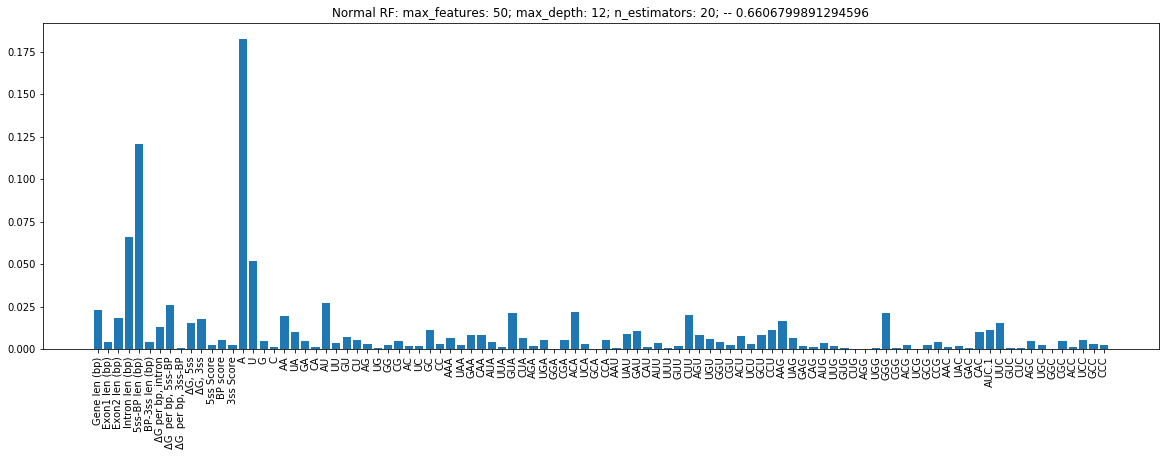

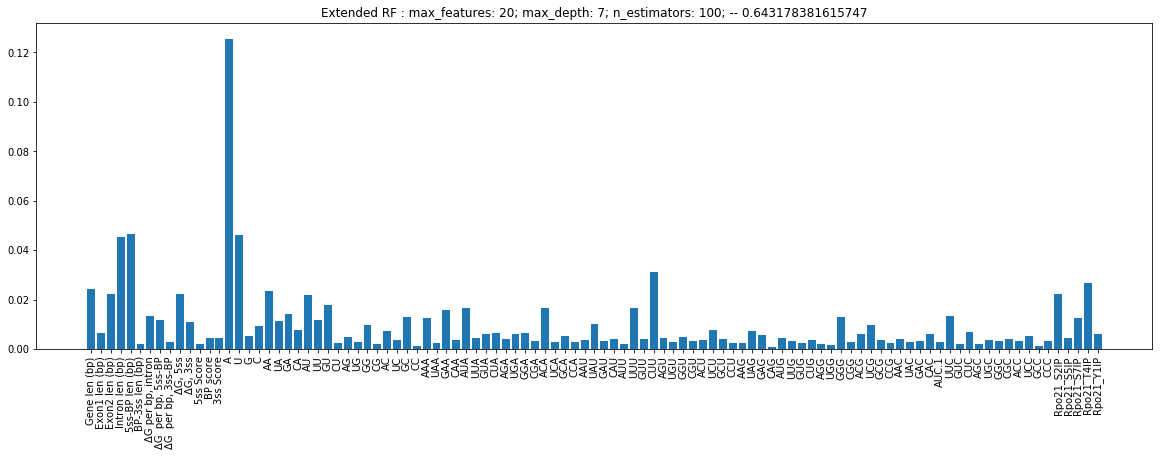

In [15]:
best_RFs(results_1_full,results_2_full,'full')

## MAE Results

Normal best: 0.6485849616979102 | max_features: 50; max_depth: 7; n_estimators: 10;

Extended best: 0.6406053037479402 | max_features: 5; max_depth: 20; n_estimators: 50;

Best difference: 0.10009093774816558 | max_features: 20; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.41756892464489404
Mean squared error:               0.03037653773504273
Mean absolute error:              0.1291034188034188
Root mean squared error:          0.1742886620955096
Correlation Coefficient:          0.6485849616979102


Extended feature space
Coefficient of determination R^2: 0.38691168381575647
Mean squared error:               0.03197545797179487
Mean absolute error:              0.13664094017094014
Root mean squared error:          0.1788168279882933
Correlation Coefficient:          0.6406053037479402


# RP Genes

In [16]:
X,y,X2,y2 = get_data('rp')

mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

results_1_rp = np.zeros((len(mxf),len(md),len(n_est)))
results_2_rp = np.zeros((len(mxf),len(md),len(n_est)))

f = FloatProgress(min=0, max=(len(mxf)*len(md)*len(n_est)))
display(f)


i = 0
for max_features in mxf:
    j = 0
    for max_depth in md:
        k = 0
        for n_estimators in n_est:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = RandomForestRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            rfr2 = RandomForestRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_rp[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_rp[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

FloatProgress(value=0.0, max=1008.0)

max_features: 5; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.158825687056795
Mean squared error:               0.02491712089136507
Mean absolute error:              0.11248528185156415
Root mean squared error:          0.157851578678723
Correlation Coefficient:          0.3989825583219799


Extended feature space
Coefficient of determination R^2: 0.26773458639919956
Mean squared error:               0.021691040197620172
Mean absolute error:              0.10672880837678116
Root mean squared error:          0.14727878393584112
Correlation Coefficient:          0.5202958105669016
-------------------------------------------------------

max_features: 5; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2002707014103008
Mean squared error:               0.023689443801015796
Mean absolute error:              0.1098328994544836
Root mean squared error:          0.15391375442440416
Correlation Coefficient:  

max_features: 5; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15626358784902183
Mean squared error:               0.02499301495364615
Mean absolute error:              0.11352958686399547
Root mean squared error:          0.1580917928092605
Correlation Coefficient:          0.40119743349678083


Extended feature space
Coefficient of determination R^2: 0.26702471262408045
Mean squared error:               0.021712067956552044
Mean absolute error:              0.10449513797117525
Root mean squared error:          0.1473501542467874
Correlation Coefficient:          0.5182453595123496
-------------------------------------------------------

max_features: 5; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.20004191427164453
Mean squared error:               0.023696220894306175
Mean absolute error:              0.10902371099284756
Root mean squared error:          0.15393576872938328
Correlation Coefficie

max_features: 5; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.12425438123530785
Mean squared error:               0.025941186169241084
Mean absolute error:              0.11624639077853366
Root mean squared error:          0.16106267776626926
Correlation Coefficient:          0.35861469768863663


Extended feature space
Coefficient of determination R^2: 0.23168304962876052
Mean squared error:               0.022758952622198896
Mean absolute error:              0.10779428360990864
Root mean squared error:          0.15086070602446117
Correlation Coefficient:          0.484251333699482
-------------------------------------------------------

max_features: 5; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.17922168095854518
Mean squared error:               0.024312954266291525
Mean absolute error:              0.10923801808942728
Root mean squared error:          0.15592611797351824
Correlation Coeff

max_features: 5; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.16618068027274868
Mean squared error:               0.024699252546722145
Mean absolute error:              0.1132142545351474
Root mean squared error:          0.1571599584713681
Correlation Coefficient:          0.4079089514451624


Extended feature space
Coefficient of determination R^2: 0.26077792311540504
Mean squared error:               0.021897109281489753
Mean absolute error:              0.10490389880952382
Root mean squared error:          0.14797671871443072
Correlation Coefficient:          0.5125638056297133
-------------------------------------------------------

max_features: 5; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.21931985231209195
Mean squared error:               0.023125173127750677
Mean absolute error:              0.10631961238662131
Root mean squared error:          0.1520696324969278
Correlation Coeffici

max_features: 5; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.14738806496685708
Mean squared error:               0.025255924166666673
Mean absolute error:              0.11451071428571429
Root mean squared error:          0.15892112561477367
Correlation Coefficient:          0.3848978156084076


Extended feature space
Coefficient of determination R^2: 0.25486228055101556
Mean squared error:               0.022072341428571434
Mean absolute error:              0.10766190476190476
Root mean squared error:          0.14856763250644953
Correlation Coefficient:          0.509430028450095
-------------------------------------------------------

max_features: 5; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.21428412939091213
Mean squared error:               0.02327434044642857
Mean absolute error:              0.10746964285714286
Root mean squared error:          0.15255930140908672
Correlation Coeffic

max_features: 5; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15113263306189695
Mean squared error:               0.025145003214285717
Mean absolute error:              0.11303690476190477
Root mean squared error:          0.15857176045653815
Correlation Coefficient:          0.3898444517126938


Extended feature space
Coefficient of determination R^2: 0.2548622805510157
Mean squared error:               0.02207234142857143
Mean absolute error:              0.10766190476190476
Root mean squared error:          0.1485676325064495
Correlation Coefficient:          0.5094300284500949
-------------------------------------------------------

max_features: 5; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.21281400312965382
Mean squared error:               0.023317888273809522
Mean absolute error:              0.10734285714285711
Root mean squared error:          0.15270195897174837
Correlation Coeffici

max_features: 5; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15113263306189662
Mean squared error:               0.025145003214285727
Mean absolute error:              0.11303690476190477
Root mean squared error:          0.15857176045653817
Correlation Coefficient:          0.3898444517126935


Extended feature space
Coefficient of determination R^2: 0.2548622805510157
Mean squared error:               0.02207234142857143
Mean absolute error:              0.10766190476190476
Root mean squared error:          0.1485676325064495
Correlation Coefficient:          0.509430028450095
-------------------------------------------------------

max_features: 5; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.21281400312965382
Mean squared error:               0.023317888273809522
Mean absolute error:              0.10734285714285711
Root mean squared error:          0.15270195897174837
Correlation Coefficie

max_features: 7; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2227043302587579
Mean squared error:               0.0230249187038416
Mean absolute error:              0.10683611971820656
Root mean squared error:          0.15173964117474906
Correlation Coefficient:          0.4734167078764215


Extended feature space
Coefficient of determination R^2: 0.32241393879883706
Mean squared error:               0.020071337820789136
Mean absolute error:              0.09738669023989999
Root mean squared error:          0.14167334901381112
Correlation Coefficient:          0.6074245317619045
-------------------------------------------------------

max_features: 7; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.22251434730136876
Mean squared error:               0.02303054634634533
Mean absolute error:              0.10762500786006787
Root mean squared error:          0.15175818378705422
Correlation Coefficient

max_features: 7; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.196818112852848
Mean squared error:               0.023791715785728678
Mean absolute error:              0.11167879253839559
Root mean squared error:          0.1542456345759214
Correlation Coefficient:          0.4477743338214009


Extended feature space
Coefficient of determination R^2: 0.31618648827519835
Mean squared error:               0.020255806289636663
Mean absolute error:              0.09962346312762674
Root mean squared error:          0.1423228944676037
Correlation Coefficient:          0.573513597541068
-------------------------------------------------------

max_features: 7; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.19412445327453676
Mean squared error:               0.023871506906689235
Mean absolute error:              0.11139191145349858
Root mean squared error:          0.15450406760564342
Correlation Coefficient:

max_features: 7; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2442229240125966
Mean squared error:               0.022387498618936113
Mean absolute error:              0.10981311276025561
Root mean squared error:          0.14962452545935145
Correlation Coefficient:          0.4943428062900237


Extended feature space
Coefficient of determination R^2: 0.37423601692587105
Mean squared error:               0.018536273131265914
Mean absolute error:              0.0957724571995465
Root mean squared error:          0.13614798247225668
Correlation Coefficient:          0.6362659024267499
-------------------------------------------------------

max_features: 7; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.2581669509208492
Mean squared error:               0.02197445105098353
Mean absolute error:              0.10638792614957795
Root mean squared error:          0.14823781923309426
Correlation Coefficie

max_features: 7; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.21459934504465927
Mean squared error:               0.023265003182522132
Mean absolute error:              0.11284429705215417
Root mean squared error:          0.15252869625916998
Correlation Coefficient:          0.46366868876865136


Extended feature space
Coefficient of determination R^2: 0.35135050520209743
Mean squared error:               0.019214183825289357
Mean absolute error:              0.09600620039682539
Root mean squared error:          0.13861523662746947
Correlation Coefficient:          0.6184052923762556
-------------------------------------------------------

max_features: 7; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.23353694803995373
Mean squared error:               0.022704036762167007
Mean absolute error:              0.10728044005102046
Root mean squared error:          0.15067858760343822
Correlation Coef

max_features: 7; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.23735327709221776
Mean squared error:               0.022590990119047614
Mean absolute error:              0.11115119047619045
Root mean squared error:          0.15030299437818134
Correlation Coefficient:          0.48839428767471216


Extended feature space
Coefficient of determination R^2: 0.3811861414269032
Mean squared error:               0.018330397738095236
Mean absolute error:              0.09580833333333331
Root mean squared error:          0.13538979923943767
Correlation Coefficient:          0.6497010154610148
-------------------------------------------------------

max_features: 7; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.24038035035427063
Mean squared error:               0.02250132267526455
Mean absolute error:              0.10721488095238098
Root mean squared error:          0.15000440885275523
Correlation Coeffi

max_features: 7; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.23735327709221765
Mean squared error:               0.022590990119047617
Mean absolute error:              0.11115119047619045
Root mean squared error:          0.15030299437818137
Correlation Coefficient:          0.4883942876747122


Extended feature space
Coefficient of determination R^2: 0.3858318347364219
Mean squared error:               0.018192783809523813
Mean absolute error:              0.09601666666666667
Root mean squared error:          0.13488062799944184
Correlation Coefficient:          0.6525081997829874
-------------------------------------------------------

max_features: 7; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.23692357767919103
Mean squared error:               0.022603718601190478
Mean absolute error:              0.10681726190476193
Root mean squared error:          0.15034533115860457
Correlation Coeffi

max_features: 7; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.23735327709221754
Mean squared error:               0.02259099011904762
Mean absolute error:              0.11115119047619045
Root mean squared error:          0.15030299437818137
Correlation Coefficient:          0.48839428767471216


Extended feature space
Coefficient of determination R^2: 0.385831834736422
Mean squared error:               0.01819278380952381
Mean absolute error:              0.09601666666666667
Root mean squared error:          0.1348806279994418
Correlation Coefficient:          0.652508199782987
-------------------------------------------------------

max_features: 7; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.23692357767919103
Mean squared error:               0.022603718601190478
Mean absolute error:              0.10681726190476193
Root mean squared error:          0.15034533115860457
Correlation Coefficien

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3155491593823615
Mean squared error:               0.02027468513653679
Mean absolute error:              0.10373101137689227
Root mean squared error:          0.1423892030195295
Correlation Coefficient:          0.564150166967101


Extended feature space
Coefficient of determination R^2: 0.3233231615679193
Mean squared error:               0.02004440498022826
Mean absolute error:              0.09978673628152672
Root mean squared error:          0.1415782645049312
Correlation Coefficient:          0.5779651360265712
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3482068489996848
Mean squared error:               0.01930730466888993
Mean absolute error:              0.09777947333735014
Root mean squared error:          0.13895072748600465
Correlation Coefficient:  

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.30244543779483113
Mean squared error:               0.02066284132473619
Mean absolute error:              0.10019124024054318
Root mean squared error:          0.143745752371109
Correlation Coefficient:          0.5511384394492029


Extended feature space
Coefficient of determination R^2: 0.35018371082206146
Mean squared error:               0.01924874640783066
Mean absolute error:              0.09786742855021241
Root mean squared error:          0.13873985154897153
Correlation Coefficient:          0.5981809452348454
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3350558823441179
Mean squared error:               0.019696860342372793
Mean absolute error:              0.09833899655903292
Root mean squared error:          0.1403455034633201
Correlation Coefficient

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2627906544129329
Mean squared error:               0.021837488501003883
Mean absolute error:              0.10503177072596716
Root mean squared error:          0.14777512815424618
Correlation Coefficient:          0.5174704129166008


Extended feature space
Coefficient of determination R^2: 0.34885175900265497
Mean squared error:               0.019288201255648705
Mean absolute error:              0.09999925305184233
Root mean squared error:          0.13888196879238393
Correlation Coefficient:          0.5970159103429123
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.33881788614453523
Mean squared error:               0.019585422912524523
Mean absolute error:              0.09722726595329274
Root mean squared error:          0.1399479292898774
Correlation Coeff

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2836951426491603
Mean squared error:               0.02121825934416994
Mean absolute error:              0.10592987103174603
Root mean squared error:          0.14566488713540385
Correlation Coefficient:          0.5329526021125605


Extended feature space
Coefficient of determination R^2: 0.32559905395813515
Mean squared error:               0.01997698888709493
Mean absolute error:              0.1005170253357753
Root mean squared error:          0.14133997625263325
Correlation Coefficient:          0.5767531366911891
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3524014884628982
Mean squared error:               0.0191830517798129
Mean absolute error:              0.09644206845238094
Root mean squared error:          0.13850289448171435
Correlation Coefficien

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.291147712702039
Mean squared error:               0.02099750059523809
Mean absolute error:              0.1035654761904762
Root mean squared error:          0.14490514343955527
Correlation Coefficient:          0.5396970969279001


Extended feature space
Coefficient of determination R^2: 0.3045163194739836
Mean squared error:               0.020601498023642497
Mean absolute error:              0.10251126700680276
Root mean squared error:          0.14353221946184241
Correlation Coefficient:          0.554252113264561
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35522020476765936
Mean squared error:               0.01909955625
Mean absolute error:              0.09593809523809524
Root mean squared error:          0.1382011441703722
Correlation Coefficient:     

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.291147712702039
Mean squared error:               0.02099750059523809
Mean absolute error:              0.1035654761904762
Root mean squared error:          0.14490514343955527
Correlation Coefficient:          0.5396970969278999


Extended feature space
Coefficient of determination R^2: 0.30979431033448923
Mean squared error:               0.020445154285714282
Mean absolute error:              0.10203571428571429
Root mean squared error:          0.14298655281429187
Correlation Coefficient:          0.5608524613861915
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35530954224128575
Mean squared error:               0.019096909910714284
Mean absolute error:              0.09592797619047622
Root mean squared error:          0.13819156960796952
Correlation Coeffic

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2911477127020391
Mean squared error:               0.02099750059523809
Mean absolute error:              0.1035654761904762
Root mean squared error:          0.14490514343955527
Correlation Coefficient:          0.5396970969279001


Extended feature space
Coefficient of determination R^2: 0.3097943103344891
Mean squared error:               0.020445154285714286
Mean absolute error:              0.10203571428571426
Root mean squared error:          0.1429865528142919
Correlation Coefficient:          0.5608524613861915
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35530954224128564
Mean squared error:               0.019096909910714287
Mean absolute error:              0.09592797619047619
Root mean squared error:          0.13819156960796952
Correlation Coeffici

max_features: 12; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.15539140561233433
Mean squared error:               0.025018850585924082
Mean absolute error:              0.11662803323666869
Root mean squared error:          0.15817348256241967
Correlation Coefficient:          0.4084232630716195


Extended feature space
Coefficient of determination R^2: 0.27063286309306656
Mean squared error:               0.021605187943638436
Mean absolute error:              0.10361350311884389
Root mean squared error:          0.14698703325000623
Correlation Coefficient:          0.5211860119579573
-------------------------------------------------------

max_features: 12; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.28742969093012205
Mean squared error:               0.02110763519699909
Mean absolute error:              0.10583929474372702
Root mean squared error:          0.14528466951815353
Correlation Coeffi

max_features: 12; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.12700139487035977
Mean squared error:               0.025859814603583876
Mean absolute error:              0.11569514361272706
Root mean squared error:          0.1608098709768274
Correlation Coefficient:          0.3970866970393551


Extended feature space
Coefficient of determination R^2: 0.29474511167971573
Mean squared error:               0.020890939061151758
Mean absolute error:              0.10461267837016192
Root mean squared error:          0.14453698163844353
Correlation Coefficient:          0.5492168990779602
-------------------------------------------------------

max_features: 12; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.29680995053986203
Mean squared error:               0.020829774759403844
Mean absolute error:              0.1044303882203551
Root mean squared error:          0.14432523950925508
Correlation Coeffic

max_features: 12; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2063311349210457
Mean squared error:               0.02350992268141225
Mean absolute error:              0.11214909444721946
Root mean squared error:          0.15332945797012473
Correlation Coefficient:          0.46678955511455794


Extended feature space
Coefficient of determination R^2: 0.3046192499029887
Mean squared error:               0.020598449036169322
Mean absolute error:              0.10522640834364047
Root mean squared error:          0.14352159780384735
Correlation Coefficient:          0.5563421840270543
-------------------------------------------------------

max_features: 12; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3456794351407474
Mean squared error:               0.019382171287730572
Mean absolute error:              0.09896952746823284
Root mean squared error:          0.13921986671352107
Correlation Coeffi

max_features: 12; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.22122537933156516
Mean squared error:               0.023068727933959813
Mean absolute error:              0.11173379560915274
Root mean squared error:          0.15188392914972873
Correlation Coefficient:          0.4800317892805416


Extended feature space
Coefficient of determination R^2: 0.24641735423094335
Mean squared error:               0.022322495584253692
Mean absolute error:              0.10801848214285717
Root mean squared error:          0.14940714703204025
Correlation Coefficient:          0.49765105174908136
-------------------------------------------------------

max_features: 12; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3437876030896153
Mean squared error:               0.019438210811523544
Mean absolute error:              0.10068732518638768
Root mean squared error:          0.13942098411474343
Correlation Coe

max_features: 12; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.23126854282679887
Mean squared error:               0.02277123107142856
Mean absolute error:              0.11027976190476187
Root mean squared error:          0.15090139519377732
Correlation Coefficient:          0.49056839704741123


Extended feature space
Coefficient of determination R^2: 0.27919325614142054
Mean squared error:               0.02135161345238095
Mean absolute error:              0.10594404761904762
Root mean squared error:          0.1461219129781052
Correlation Coefficient:          0.5325859061604399
-------------------------------------------------------

max_features: 12; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3448795199913427
Mean squared error:               0.019405866236772477
Mean absolute error:              0.09998769841269839
Root mean squared error:          0.13930493974289812
Correlation Coeffi

max_features: 12; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2591774381691193
Mean squared error:               0.021944518571428567
Mean absolute error:              0.10993333333333334
Root mean squared error:          0.1481368238198341
Correlation Coefficient:          0.5145851511418958


Extended feature space
Coefficient of determination R^2: 0.27919325614142054
Mean squared error:               0.02135161345238095
Mean absolute error:              0.10594404761904765
Root mean squared error:          0.1461219129781052
Correlation Coefficient:          0.53258590616044
-------------------------------------------------------

max_features: 12; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3569516720503467
Mean squared error:               0.019048267023809524
Mean absolute error:              0.0999261904761905
Root mean squared error:          0.13801545936528098
Correlation Coefficient

max_features: 12; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2591774381691193
Mean squared error:               0.021944518571428567
Mean absolute error:              0.10993333333333334
Root mean squared error:          0.1481368238198341
Correlation Coefficient:          0.5145851511418958


Extended feature space
Coefficient of determination R^2: 0.27919325614142076
Mean squared error:               0.021351613452380947
Mean absolute error:              0.10594404761904762
Root mean squared error:          0.1461219129781052
Correlation Coefficient:          0.5325859061604401
-------------------------------------------------------

max_features: 12; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35695167205034695
Mean squared error:               0.019048267023809514
Mean absolute error:              0.09992619047619046
Root mean squared error:          0.13801545936528095
Correlation Coeffi

max_features: 15; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3500352196121955
Mean squared error:               0.019253144988922118
Mean absolute error:              0.1007634591836306
Root mean squared error:          0.13875570254559672
Correlation Coefficient:          0.6001364250941165


Extended feature space
Coefficient of determination R^2: 0.3154096950784938
Mean squared error:               0.02027881632417059
Mean absolute error:              0.10037992580234321
Root mean squared error:          0.14240370895510618
Correlation Coefficient:          0.5690128875335618
-------------------------------------------------------

max_features: 15; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3654506572070938
Mean squared error:               0.018796511546560563
Mean absolute error:              0.09497620979105345
Root mean squared error:          0.13710037033706568
Correlation Coefficien

max_features: 15; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3401242621659091
Mean squared error:               0.01954672566659905
Mean absolute error:              0.0998673068341892
Root mean squared error:          0.13980960505844744
Correlation Coefficient:          0.5884082012879339


Extended feature space
Coefficient of determination R^2: 0.27647477175482615
Mean squared error:               0.02143213992954483
Mean absolute error:              0.10329758139813405
Root mean squared error:          0.1463971991861348
Correlation Coefficient:          0.5326157923566237
-------------------------------------------------------

max_features: 15; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3460914562289742
Mean squared error:               0.01936996646988584
Mean absolute error:              0.09603838380690988
Root mean squared error:          0.13917602692233258
Correlation Coefficient:

max_features: 15; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.35959312314755243
Mean squared error:               0.01897002241350109
Mean absolute error:              0.10089534206864564
Root mean squared error:          0.13773170446016084
Correlation Coefficient:          0.6063984862615891


Extended feature space
Coefficient of determination R^2: 0.333645917518513
Mean squared error:               0.019738626078049198
Mean absolute error:              0.10084048701959414
Root mean squared error:          0.14049422079946633
Correlation Coefficient:          0.5872768717960224
-------------------------------------------------------

max_features: 15; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.36707776630645883
Mean squared error:               0.018748313600536196
Mean absolute error:              0.0974993492535903
Root mean squared error:          0.13692448137764188
Correlation Coeffic

max_features: 15; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.39892079335447916
Mean squared error:               0.017805064927468237
Mean absolute error:              0.09899640589569161
Root mean squared error:          0.13343562090936675
Correlation Coefficient:          0.6429373846380281


Extended feature space
Coefficient of determination R^2: 0.33673504311483593
Mean squared error:               0.01964712053068783
Mean absolute error:              0.09845373015873016
Root mean squared error:          0.14016818658557237
Correlation Coefficient:          0.594770258521141
-------------------------------------------------------

max_features: 15; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3784922644542682
Mean squared error:               0.01841019529867308
Mean absolute error:              0.09705537226001508
Root mean squared error:          0.13568417482769712
Correlation Coeffic

max_features: 15; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4033719245053071
Mean squared error:               0.017673214285714285
Mean absolute error:              0.09895714285714284
Root mean squared error:          0.13294064196367597
Correlation Coefficient:          0.6469229256145801


Extended feature space
Coefficient of determination R^2: 0.3393463954747893
Mean squared error:               0.019569767500000005
Mean absolute error:              0.09897023809523811
Root mean squared error:          0.13989198511708956
Correlation Coefficient:          0.5945357273571582
-------------------------------------------------------

max_features: 15; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.387669777152437
Mean squared error:               0.018138340595238087
Mean absolute error:              0.09635952380952377
Root mean squared error:          0.13467865679178007
Correlation Coeffic

max_features: 15; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4033719245053071
Mean squared error:               0.017673214285714285
Mean absolute error:              0.09895714285714284
Root mean squared error:          0.13294064196367597
Correlation Coefficient:          0.64692292561458


Extended feature space
Coefficient of determination R^2: 0.3393463954747894
Mean squared error:               0.0195697675
Mean absolute error:              0.09897023809523811
Root mean squared error:          0.13989198511708953
Correlation Coefficient:          0.5945357273571583
-------------------------------------------------------

max_features: 15; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.38766977715243667
Mean squared error:               0.018138340595238094
Mean absolute error:              0.0963595238095238
Root mean squared error:          0.1346786567917801
Correlation Coefficient:     

max_features: 15; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4033719245053071
Mean squared error:               0.017673214285714285
Mean absolute error:              0.09895714285714284
Root mean squared error:          0.13294064196367597
Correlation Coefficient:          0.6469229256145802


Extended feature space
Coefficient of determination R^2: 0.3393463954747893
Mean squared error:               0.019569767500000005
Mean absolute error:              0.09897023809523811
Root mean squared error:          0.13989198511708956
Correlation Coefficient:          0.5945357273571583
-------------------------------------------------------

max_features: 15; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3876697771524369
Mean squared error:               0.01813834059523809
Mean absolute error:              0.09635952380952377
Root mean squared error:          0.1346786567917801
Correlation Coeffici

max_features: 18; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.27320285424088675
Mean squared error:               0.021529060107665993
Mean absolute error:              0.10288274770358463
Root mean squared error:          0.1467278436686984
Correlation Coefficient:          0.5252949459110453


Extended feature space
Coefficient of determination R^2: 0.34620720163598995
Mean squared error:               0.01936653787933706
Mean absolute error:              0.09947853895297258
Root mean squared error:          0.13916370891628702
Correlation Coefficient:          0.5939199649027098
-------------------------------------------------------

max_features: 18; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.33785942932069013
Mean squared error:               0.019613814155791737
Mean absolute error:              0.09886795264445074
Root mean squared error:          0.1400493275806483
Correlation Coeffici

max_features: 18; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.28683186607951394
Mean squared error:               0.021125343861951477
Mean absolute error:              0.10338437778921727
Root mean squared error:          0.14534560145374706
Correlation Coefficient:          0.5378901293755983


Extended feature space
Coefficient of determination R^2: 0.3660530493734425
Mean squared error:               0.018778667589366478
Mean absolute error:              0.09641731384562807
Root mean squared error:          0.1370352786306011
Correlation Coefficient:          0.6102186778754236
-------------------------------------------------------

max_features: 18; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34683360606944036
Mean squared error:               0.01934798263489485
Mean absolute error:              0.09850969684180494
Root mean squared error:          0.13909702597429915
Correlation Coeffici

max_features: 18; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3242911606979304
Mean squared error:               0.020015731076408222
Mean absolute error:              0.10107072820037104
Root mean squared error:          0.14147696305903737
Correlation Coefficient:          0.5783490675199308


Extended feature space
Coefficient of determination R^2: 0.30896277802136196
Mean squared error:               0.020469785792944662
Mean absolute error:              0.10383435352346067
Root mean squared error:          0.14307265913844147
Correlation Coefficient:          0.5569156352659896
-------------------------------------------------------

max_features: 18; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.37619674981629125
Mean squared error:               0.018478192638656323
Mean absolute error:              0.09613801711846354
Root mean squared error:          0.13593451599449025
Correlation Coef

max_features: 18; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3032206349042996
Mean squared error:               0.020639878569223984
Mean absolute error:              0.10188571428571427
Root mean squared error:          0.14366585735387508
Correlation Coefficient:          0.5542123865020491


Extended feature space
Coefficient of determination R^2: 0.3371438307351947
Mean squared error:               0.01963501149407242
Mean absolute error:              0.10276169642857143
Root mean squared error:          0.1401249852598473
Correlation Coefficient:          0.5856098482249933
-------------------------------------------------------

max_features: 18; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3654201922927932
Mean squared error:               0.018797413973014737
Mean absolute error:              0.09754589195526694
Root mean squared error:          0.13710366141359878
Correlation Coeffici

max_features: 18; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2884498268969441
Mean squared error:               0.021077416904761902
Mean absolute error:              0.1046428571428571
Root mean squared error:          0.14518063543311105
Correlation Coefficient:          0.5389712349195216


Extended feature space
Coefficient of determination R^2: 0.33614399111467597
Mean squared error:               0.019664628571428568
Mean absolute error:              0.10192142857142858
Root mean squared error:          0.14023062636752562
Correlation Coefficient:          0.5849011674928928
-------------------------------------------------------

max_features: 18; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35762833280574713
Mean squared error:               0.019028223095238092
Mean absolute error:              0.09904047619047616
Root mean squared error:          0.1379428254576442
Correlation Coeffi

max_features: 18; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.288449826896944
Mean squared error:               0.021077416904761906
Mean absolute error:              0.10464285714285713
Root mean squared error:          0.14518063543311108
Correlation Coefficient:          0.5389712349195215


Extended feature space
Coefficient of determination R^2: 0.33614399111467574
Mean squared error:               0.01966462857142857
Mean absolute error:              0.10192142857142858
Root mean squared error:          0.14023062636752562
Correlation Coefficient:          0.584901167492893
-------------------------------------------------------

max_features: 18; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35762833280574735
Mean squared error:               0.01902822309523809
Mean absolute error:              0.09904047619047616
Root mean squared error:          0.1379428254576442
Correlation Coefficie

max_features: 18; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2884498268969441
Mean squared error:               0.0210774169047619
Mean absolute error:              0.10464285714285713
Root mean squared error:          0.14518063543311105
Correlation Coefficient:          0.5389712349195217


Extended feature space
Coefficient of determination R^2: 0.33614399111467574
Mean squared error:               0.01966462857142857
Mean absolute error:              0.10192142857142858
Root mean squared error:          0.14023062636752562
Correlation Coefficient:          0.5849011674928929
-------------------------------------------------------

max_features: 18; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35762833280574724
Mean squared error:               0.01902822309523809
Mean absolute error:              0.09904047619047616
Root mean squared error:          0.1379428254576442
Correlation Coefficie

max_features: 20; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.34515067092350016
Mean squared error:               0.019397834250473783
Mean absolute error:              0.09858468603430699
Root mean squared error:          0.13927610796713766
Correlation Coefficient:          0.5911279036171819


Extended feature space
Coefficient of determination R^2: 0.32095345033838785
Mean squared error:               0.020114600158891365
Mean absolute error:              0.10618861930789902
Root mean squared error:          0.14182595023087757
Correlation Coefficient:          0.5740453354020587
-------------------------------------------------------

max_features: 20; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3407392748319802
Mean squared error:               0.019528507867131784
Mean absolute error:              0.09827925776986689
Root mean squared error:          0.13974443769657446
Correlation Coeffi

max_features: 20; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3866844725101699
Mean squared error:               0.018167527119967178
Mean absolute error:              0.09435181021024845
Root mean squared error:          0.13478696939974272
Correlation Coefficient:          0.6264606820277189


Extended feature space
Coefficient of determination R^2: 0.29871422351752
Mean squared error:               0.020773366712624048
Mean absolute error:              0.1024220120671497
Root mean squared error:          0.1441296871314999
Correlation Coefficient:          0.5474764274381902
-------------------------------------------------------

max_features: 20; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3767005000276046
Mean squared error:               0.018463270636496713
Mean absolute error:              0.09389922805168399
Root mean squared error:          0.13587961817909525
Correlation Coefficient:

max_features: 20; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3235729720230546
Mean squared error:               0.02003700513787127
Mean absolute error:              0.09723606056311414
Root mean squared error:          0.14155212869424208
Correlation Coefficient:          0.5702625709475024


Extended feature space
Coefficient of determination R^2: 0.3519645685468471
Mean squared error:               0.019195994146455078
Mean absolute error:              0.10014967145045153
Root mean squared error:          0.13854960897258092
Correlation Coefficient:          0.5964942609240803
-------------------------------------------------------

max_features: 20; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3710041397059747
Mean squared error:               0.018632007242680278
Mean absolute error:              0.09502562676245715
Root mean squared error:          0.13649911077615223
Correlation Coeffic

max_features: 20; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.32838549012895757
Mean squared error:               0.019894449553860268
Mean absolute error:              0.0985411678004535
Root mean squared error:          0.14104768538994275
Correlation Coefficient:          0.5738601344735542


Extended feature space
Coefficient of determination R^2: 0.3426435995329852
Mean squared error:               0.019472098288211896
Mean absolute error:              0.10182120701058198
Root mean squared error:          0.13954246052084612
Correlation Coefficient:          0.5878645873514331
-------------------------------------------------------

max_features: 20; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35845596122806833
Mean squared error:               0.019003707228390055
Mean absolute error:              0.09733049461451249
Root mean squared error:          0.13785393439575838
Correlation Coeff

max_features: 20; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31930630325388765
Mean squared error:               0.020163391666666666
Mean absolute error:              0.09843333333333333
Root mean squared error:          0.14199785796506462
Correlation Coefficient:          0.5658167410962599


Extended feature space
Coefficient of determination R^2: 0.3484214519193789
Mean squared error:               0.019300947738095233
Mean absolute error:              0.10206309523809519
Root mean squared error:          0.13892785083666714
Correlation Coefficient:          0.5932252225270515
-------------------------------------------------------

max_features: 20; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35496729141167993
Mean squared error:               0.01910704800595238
Mean absolute error:              0.0969196428571429
Root mean squared error:          0.1382282460496131
Correlation Coeffic

max_features: 20; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31930630325388765
Mean squared error:               0.020163391666666666
Mean absolute error:              0.09843333333333333
Root mean squared error:          0.14199785796506462
Correlation Coefficient:          0.5658167410962601


Extended feature space
Coefficient of determination R^2: 0.3484214519193788
Mean squared error:               0.019300947738095237
Mean absolute error:              0.10206309523809519
Root mean squared error:          0.13892785083666714
Correlation Coefficient:          0.5932252225270511
-------------------------------------------------------

max_features: 20; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35496729141168015
Mean squared error:               0.019107048005952372
Mean absolute error:              0.09691964285714286
Root mean squared error:          0.13822824604961306
Correlation Coef

max_features: 20; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31930630325388765
Mean squared error:               0.020163391666666666
Mean absolute error:              0.09843333333333333
Root mean squared error:          0.14199785796506462
Correlation Coefficient:          0.5658167410962601


Extended feature space
Coefficient of determination R^2: 0.3484214519193788
Mean squared error:               0.019300947738095237
Mean absolute error:              0.10206309523809519
Root mean squared error:          0.13892785083666714
Correlation Coefficient:          0.5932252225270511
-------------------------------------------------------

max_features: 20; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35496729141168015
Mean squared error:               0.019107048005952372
Mean absolute error:              0.0969196428571429
Root mean squared error:          0.13822824604961306
Correlation Coeff

max_features: 25; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3064019821987648
Mean squared error:               0.020545641246574122
Mean absolute error:              0.1028271298515498
Root mean squared error:          0.14333750816368382
Correlation Coefficient:          0.5536871780050759


Extended feature space
Coefficient of determination R^2: 0.46512058400994816
Mean squared error:               0.015844106109106467
Mean absolute error:              0.09121619168420808
Root mean squared error:          0.12587337331265286
Correlation Coefficient:          0.6995253307038448
-------------------------------------------------------

max_features: 25; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3539804042927803
Mean squared error:               0.019136281406532236
Mean absolute error:              0.09645187657450476
Root mean squared error:          0.13833394885758246
Correlation Coeffici

max_features: 25; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3293217109159392
Mean squared error:               0.01986671698265442
Mean absolute error:              0.09999969441874174
Root mean squared error:          0.1409493419021686
Correlation Coefficient:          0.5741673732440072


Extended feature space
Coefficient of determination R^2: 0.4460049859633548
Mean squared error:               0.016410345068271957
Mean absolute error:              0.09267565927854694
Root mean squared error:          0.12810286908680835
Correlation Coefficient:          0.6813590007606032
-------------------------------------------------------

max_features: 25; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3429054911309156
Mean squared error:               0.019464340580319896
Mean absolute error:              0.09795322834963444
Root mean squared error:          0.1395146608078158
Correlation Coefficient

max_features: 25; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3314726586389175
Mean squared error:               0.019803001978974704
Mean absolute error:              0.09811580711451248
Root mean squared error:          0.14072313945820958
Correlation Coefficient:          0.5767770233138383


Extended feature space
Coefficient of determination R^2: 0.4514942838654388
Mean squared error:               0.016247742029483998
Mean absolute error:              0.093037202538133
Root mean squared error:          0.12746663104312436
Correlation Coefficient:          0.6868831471703827
-------------------------------------------------------

max_features: 25; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3675440030233529
Mean squared error:               0.018734502816659313
Mean absolute error:              0.09362262224018394
Root mean squared error:          0.13687403996616493
Correlation Coeffici

max_features: 25; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31078531609360294
Mean squared error:               0.020415798883482043
Mean absolute error:              0.09888309523809523
Root mean squared error:          0.14288386502149933
Correlation Coefficient:          0.5596790280435551


Extended feature space
Coefficient of determination R^2: 0.4463438782973489
Mean squared error:               0.016400306457813513
Mean absolute error:              0.09409256081220367
Root mean squared error:          0.12806368125980727
Correlation Coefficient:          0.6829122283345664
-------------------------------------------------------

max_features: 25; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3799708555718847
Mean squared error:               0.01836639672677228
Mean absolute error:              0.09391390873015874
Root mean squared error:          0.13552267975055793
Correlation Coeffi

max_features: 25; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31889521644248897
Mean squared error:               0.020175568809523804
Mean absolute error:              0.09837619047619048
Root mean squared error:          0.14204072940366014
Correlation Coefficient:          0.5663072187791616


Extended feature space
Coefficient of determination R^2: 0.4500577629610151
Mean squared error:               0.016290294404761905
Mean absolute error:              0.09404880952380952
Root mean squared error:          0.12763343764375346
Correlation Coefficient:          0.6871671796755877
-------------------------------------------------------

max_features: 25; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3830594010661198
Mean squared error:               0.018274908363095237
Mean absolute error:              0.09426488095238096
Root mean squared error:          0.13518471941419724
Correlation Coeff

max_features: 25; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31889521644248886
Mean squared error:               0.020175568809523807
Mean absolute error:              0.09837619047619046
Root mean squared error:          0.14204072940366017
Correlation Coefficient:          0.5663072187791617


Extended feature space
Coefficient of determination R^2: 0.4471425904796229
Mean squared error:               0.016376647142857147
Mean absolute error:              0.09423809523809525
Root mean squared error:          0.12797127467856662
Correlation Coefficient:          0.6845183676953136
-------------------------------------------------------

max_features: 25; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3830594010661198
Mean squared error:               0.018274908363095237
Mean absolute error:              0.09426488095238096
Root mean squared error:          0.13518471941419724
Correlation Coeff

max_features: 25; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.31889521644248897
Mean squared error:               0.020175568809523804
Mean absolute error:              0.09837619047619046
Root mean squared error:          0.14204072940366014
Correlation Coefficient:          0.5663072187791616


Extended feature space
Coefficient of determination R^2: 0.4471425904796229
Mean squared error:               0.016376647142857147
Mean absolute error:              0.09423809523809525
Root mean squared error:          0.12797127467856662
Correlation Coefficient:          0.6845183676953134
-------------------------------------------------------

max_features: 25; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3830594010661197
Mean squared error:               0.018274908363095237
Mean absolute error:              0.09426488095238096
Root mean squared error:          0.13518471941419724
Correlation Coeff

max_features: 30; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3617453729411929
Mean squared error:               0.01890626884010806
Mean absolute error:              0.09748205439441471
Root mean squared error:          0.13750006850946678
Correlation Coefficient:          0.6051874790114918


Extended feature space
Coefficient of determination R^2: 0.42499808831525454
Mean squared error:               0.01703260777909916
Mean absolute error:              0.09120963706250236
Root mean squared error:          0.13050903332374797
Correlation Coefficient:          0.6626812962044659
-------------------------------------------------------

max_features: 30; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.34593460378919894
Mean squared error:               0.01937461272589229
Mean absolute error:              0.09586272778461896
Root mean squared error:          0.13919271793413723
Correlation Coefficie

max_features: 30; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4083081031961908
Mean squared error:               0.017526995649113534
Mean absolute error:              0.09473934095731014
Root mean squared error:          0.13238956019684306
Correlation Coefficient:          0.6470542100102324


Extended feature space
Coefficient of determination R^2: 0.4435435130377112
Mean squared error:               0.016483258396122503
Mean absolute error:              0.0903280360397248
Root mean squared error:          0.12838714264334455
Correlation Coefficient:          0.674779945123378
-------------------------------------------------------

max_features: 30; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.369095065980378
Mean squared error:               0.01868855749639022
Mean absolute error:              0.09592879119637439
Root mean squared error:          0.1367060989729069
Correlation Coefficient: 

max_features: 30; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.37455641887488533
Mean squared error:               0.01852678223981265
Mean absolute error:              0.09831178343438825
Root mean squared error:          0.13611312295224384
Correlation Coefficient:          0.6167333039599399


Extended feature space
Coefficient of determination R^2: 0.43751566014692667
Mean squared error:               0.016661814418202536
Mean absolute error:              0.09025546319916858
Root mean squared error:          0.12908065082808706
Correlation Coefficient:          0.6698389468979908
-------------------------------------------------------

max_features: 30; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.40006420759950767
Mean squared error:               0.017771194907266835
Mean absolute error:              0.09391449479731506
Root mean squared error:          0.133308645283293
Correlation Coeffi

max_features: 30; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.38228879999014476
Mean squared error:               0.018297734975693404
Mean absolute error:              0.09760884954992098
Root mean squared error:          0.13526912055489015
Correlation Coefficient:          0.6240260409468442


Extended feature space
Coefficient of determination R^2: 0.4570851187419711
Mean squared error:               0.016082131279894187
Mean absolute error:              0.08648388888888892
Root mean squared error:          0.12681534323532853
Correlation Coefficient:          0.6859897398698902
-------------------------------------------------------

max_features: 30; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.39259008091119385
Mean squared error:               0.01799259220314773
Mean absolute error:              0.09528859805538377
Root mean squared error:          0.13413646858012823
Correlation Coeff

max_features: 30; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.39098830087048897
Mean squared error:               0.018040039856150793
Mean absolute error:              0.09705674603174601
Root mean squared error:          0.13431321549330427
Correlation Coefficient:          0.6314458755710104


Extended feature space
Coefficient of determination R^2: 0.4541232816344052
Mean squared error:               0.01616986630952381
Mean absolute error:              0.08723690476190477
Root mean squared error:          0.12716078919825802
Correlation Coefficient:          0.6844633025530275
-------------------------------------------------------

max_features: 30; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3998530043980473
Mean squared error:               0.01777745113219246
Mean absolute error:              0.09414593253968256
Root mean squared error:          0.13333210840676174
Correlation Coeffic

max_features: 30; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3887348620556833
Mean squared error:               0.01810679083333333
Mean absolute error:              0.09714642857142856
Root mean squared error:          0.13456147603728688
Correlation Coefficient:          0.6294458213883896


Extended feature space
Coefficient of determination R^2: 0.4547715447340752
Mean squared error:               0.016150663571428574
Mean absolute error:              0.08711428571428573
Root mean squared error:          0.12708526103143736
Correlation Coefficient:          0.6850253659064939
-------------------------------------------------------

max_features: 30; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.39835212141962295
Mean squared error:               0.017821910029761908
Mean absolute error:              0.09418392857142859
Root mean squared error:          0.13349872669715585
Correlation Coeffi

max_features: 30; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3887348620556833
Mean squared error:               0.01810679083333333
Mean absolute error:              0.09714642857142856
Root mean squared error:          0.13456147603728688
Correlation Coefficient:          0.6294458213883891


Extended feature space
Coefficient of determination R^2: 0.4547715447340752
Mean squared error:               0.016150663571428574
Mean absolute error:              0.08711428571428573
Root mean squared error:          0.12708526103143736
Correlation Coefficient:          0.6850253659064943
-------------------------------------------------------

max_features: 30; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.39835212141962295
Mean squared error:               0.017821910029761908
Mean absolute error:              0.09418392857142859
Root mean squared error:          0.13349872669715585
Correlation Coeffi

max_features: 50; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3601981100613588
Mean squared error:               0.01895210159514388
Mean absolute error:              0.09460272895885659
Root mean squared error:          0.13766663210503802
Correlation Coefficient:          0.6033070048826271


Extended feature space
Coefficient of determination R^2: 0.3878671400441108
Mean squared error:               0.018132494345589664
Mean absolute error:              0.09351655736575099
Root mean squared error:          0.13465695060259483
Correlation Coefficient:          0.6246077549051701
-------------------------------------------------------

max_features: 50; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.41423723003869717
Mean squared error:               0.01735136407306356
Mean absolute error:              0.09198412174358389
Root mean squared error:          0.13172457657196535
Correlation Coefficie

max_features: 50; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3537496480095953
Mean squared error:               0.019143116829483327
Mean absolute error:              0.09848858551772707
Root mean squared error:          0.13835865288981145
Correlation Coefficient:          0.5978113899076865


Extended feature space
Coefficient of determination R^2: 0.3804544721012496
Mean squared error:               0.01835207112107816
Mean absolute error:              0.09279414980133469
Root mean squared error:          0.13546981627313945
Correlation Coefficient:          0.6205208540066854
-------------------------------------------------------

max_features: 50; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4187061423985148
Mean squared error:               0.017218986719393693
Mean absolute error:              0.09371222569077754
Root mean squared error:          0.13122113670973015
Correlation Coefficie

max_features: 50; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3467147913184513
Mean squared error:               0.019351502145023153
Mean absolute error:              0.09940648809523808
Root mean squared error:          0.13910967667643812
Correlation Coefficient:          0.5921613785494145


Extended feature space
Coefficient of determination R^2: 0.4060186232292279
Mean squared error:               0.01759481423110942
Mean absolute error:              0.09265843679138322
Root mean squared error:          0.13264544557243352
Correlation Coefficient:          0.6397135705333001
-------------------------------------------------------

max_features: 50; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4192401760810911
Mean squared error:               0.017203167665454377
Mean absolute error:              0.09345729426492819
Root mean squared error:          0.13116084654139123
Correlation Coeffic

max_features: 50; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3641765084042211
Mean squared error:               0.018834254163359786
Mean absolute error:              0.09846567460317461
Root mean squared error:          0.13723794724258953
Correlation Coefficient:          0.6073696066517906


Extended feature space
Coefficient of determination R^2: 0.40030529049200825
Mean squared error:               0.01776405359126985
Mean absolute error:              0.09258968253968256
Root mean squared error:          0.1332818576973995
Correlation Coefficient:          0.6343113659941092
-------------------------------------------------------

max_features: 50; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.42035884441169913
Mean squared error:               0.01717003066447586
Mean absolute error:              0.09406165674603173
Root mean squared error:          0.13103446365165106
Correlation Coeffic

max_features: 50; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.36415718936658736
Mean squared error:               0.018834826428571427
Mean absolute error:              0.09846428571428573
Root mean squared error:          0.1372400321647129
Correlation Coefficient:          0.6073503420279375


Extended feature space
Coefficient of determination R^2: 0.39549837102596674
Mean squared error:               0.017906443333333334
Mean absolute error:              0.0937
Root mean squared error:          0.13381495930326076
Correlation Coefficient:          0.630301348513284
-------------------------------------------------------

max_features: 50; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4191929754871665
Mean squared error:               0.017204565833333334
Mean absolute error:              0.09376309523809524
Root mean squared error:          0.13116617640738534
Correlation Coefficient:       

max_features: 50; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.36415718936658736
Mean squared error:               0.018834826428571427
Mean absolute error:              0.09846428571428573
Root mean squared error:          0.1372400321647129
Correlation Coefficient:          0.6073503420279375


Extended feature space
Coefficient of determination R^2: 0.39549837102596674
Mean squared error:               0.017906443333333334
Mean absolute error:              0.0937
Root mean squared error:          0.13381495930326076
Correlation Coefficient:          0.630301348513284
-------------------------------------------------------

max_features: 50; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4191929754871666
Mean squared error:               0.017204565833333334
Mean absolute error:              0.09376309523809524
Root mean squared error:          0.13116617640738534
Correlation Coefficient:       

max_features: 50; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.36415718936658736
Mean squared error:               0.018834826428571427
Mean absolute error:              0.09846428571428573
Root mean squared error:          0.1372400321647129
Correlation Coefficient:          0.6073503420279374


Extended feature space
Coefficient of determination R^2: 0.39549837102596663
Mean squared error:               0.017906443333333338
Mean absolute error:              0.0937
Root mean squared error:          0.1338149593032608
Correlation Coefficient:          0.6303013485132841
-------------------------------------------------------

max_features: 50; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4191929754871666
Mean squared error:               0.017204565833333334
Mean absolute error:              0.09376309523809526
Root mean squared error:          0.13116617640738534
Correlation Coefficient:       

max_features: 80; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4381466325445784
Mean squared error:               0.01664312386231003
Mean absolute error:              0.09017204232233034
Root mean squared error:          0.12900823176181445
Correlation Coefficient:          0.6629452117811816


Extended feature space
Coefficient of determination R^2: 0.3986255909186316
Mean squared error:               0.017813809363274535
Mean absolute error:              0.0911637353969615
Root mean squared error:          0.13346838338450998
Correlation Coefficient:          0.6334175685078832
-------------------------------------------------------

max_features: 80; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.42367424595946035
Mean squared error:               0.017071822409780186
Mean absolute error:              0.09171476225826457
Root mean squared error:          0.1306591841769272
Correlation Coefficien

max_features: 80; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4570947424933799
Mean squared error:               0.016081846206784378
Mean absolute error:              0.08783491998257122
Root mean squared error:          0.12681421926102915
Correlation Coefficient:          0.6793791290764457


Extended feature space
Coefficient of determination R^2: 0.398287414102636
Mean squared error:               0.01782382677878183
Mean absolute error:              0.0931252498946354
Root mean squared error:          0.1335059054078951
Correlation Coefficient:          0.6340963511757373
-------------------------------------------------------

max_features: 80; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.43414892750006207
Mean squared error:               0.016761543193891497
Mean absolute error:              0.08994488266487474
Root mean squared error:          0.12946637862353105
Correlation Coefficient

max_features: 80; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.4298889254431021
Mean squared error:               0.016887732242483976
Mean absolute error:              0.08997308390022676
Root mean squared error:          0.12995280775144483
Correlation Coefficient:          0.656995494930351


Extended feature space
Coefficient of determination R^2: 0.3875069580750121
Mean squared error:               0.01814316359395927
Mean absolute error:              0.09308637944066515
Root mean squared error:          0.13469656118089754
Correlation Coefficient:          0.6243286374370758
-------------------------------------------------------

max_features: 80; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.40357407334662265
Mean squared error:               0.017667226267488328
Mean absolute error:              0.09283130999622073
Root mean squared error:          0.132918118657647
Correlation Coefficie

max_features: 80; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.46440965824966884
Mean squared error:               0.015865165029761905
Mean absolute error:              0.08706130952380955
Root mean squared error:          0.1259569967479453
Correlation Coefficient:          0.6838285208124723


Extended feature space
Coefficient of determination R^2: 0.37887992055041375
Mean squared error:               0.018398712216435183
Mean absolute error:              0.09427212301587302
Root mean squared error:          0.13564185274624932
Correlation Coefficient:          0.6160174667838234
-------------------------------------------------------

max_features: 80; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.41835628256707924
Mean squared error:               0.017229350207175923
Mean absolute error:              0.09207454365079364
Root mean squared error:          0.13126061940725375
Correlation Coef

max_features: 80; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.46213516617944583
Mean squared error:               0.01593253964285714
Mean absolute error:              0.08747976190476192
Root mean squared error:          0.12622416425889751
Correlation Coefficient:          0.6821011794997821


Extended feature space
Coefficient of determination R^2: 0.3805169558540188
Mean squared error:               0.01835022023809524
Mean absolute error:              0.09382142857142857
Root mean squared error:          0.13546298475264465
Correlation Coefficient:          0.6175753285063204
-------------------------------------------------------

max_features: 80; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4220118276295446
Mean squared error:               0.0171210662797619
Mean absolute error:              0.09221488095238095
Root mean squared error:          0.13084749244735988
Correlation Coefficie

max_features: 80; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.46213516617944583
Mean squared error:               0.01593253964285714
Mean absolute error:              0.08747976190476191
Root mean squared error:          0.12622416425889751
Correlation Coefficient:          0.6821011794997823


Extended feature space
Coefficient of determination R^2: 0.3805169558540189
Mean squared error:               0.018350220238095235
Mean absolute error:              0.09382142857142857
Root mean squared error:          0.13546298475264465
Correlation Coefficient:          0.6175753285063201
-------------------------------------------------------

max_features: 80; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4220118276295446
Mean squared error:               0.0171210662797619
Mean absolute error:              0.09221488095238095
Root mean squared error:          0.13084749244735988
Correlation Coeffici

max_features: 80; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.46213516617944583
Mean squared error:               0.01593253964285714
Mean absolute error:              0.08747976190476192
Root mean squared error:          0.12622416425889751
Correlation Coefficient:          0.6821011794997821


Extended feature space
Coefficient of determination R^2: 0.3805169558540189
Mean squared error:               0.018350220238095235
Mean absolute error:              0.09382142857142857
Root mean squared error:          0.13546298475264465
Correlation Coefficient:          0.6175753285063202
-------------------------------------------------------

max_features: 80; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.4220118276295446
Mean squared error:               0.0171210662797619
Mean absolute error:              0.09221488095238092
Root mean squared error:          0.13084749244735988
Correlation Coeffici

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.3155491593823616
Mean squared error:               0.020274685136536786
Mean absolute error:              0.10373101137689224
Root mean squared error:          0.14238920301952948
Correlation Coefficient:          0.5641501669671009


Extended feature space
Coefficient of determination R^2: 0.3233231615679193
Mean squared error:               0.020044404980228265
Mean absolute error:              0.09978673628152672
Root mean squared error:          0.14157826450493122
Correlation Coefficient:          0.5779651360265713
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3482068489996848
Mean squared error:               0.01930730466888993
Mean absolute error:              0.09777947333735011
Root mean squared error:          0.13895072748600465
Correlation Coefficie

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.302445437794831
Mean squared error:               0.020662841324736194
Mean absolute error:              0.1001912402405432
Root mean squared error:          0.143745752371109
Correlation Coefficient:          0.5511384394492028


Extended feature space
Coefficient of determination R^2: 0.35018371082206134
Mean squared error:               0.01924874640783066
Mean absolute error:              0.09786742855021238
Root mean squared error:          0.13873985154897153
Correlation Coefficient:          0.5981809452348454
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3350558823441179
Mean squared error:               0.019696860342372793
Mean absolute error:              0.09833899655903292
Root mean squared error:          0.1403455034633201
Correlation Coefficient: 

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2627906544129329
Mean squared error:               0.021837488501003883
Mean absolute error:              0.10503177072596716
Root mean squared error:          0.14777512815424618
Correlation Coefficient:          0.5174704129166008


Extended feature space
Coefficient of determination R^2: 0.34885175900265475
Mean squared error:               0.019288201255648712
Mean absolute error:              0.09999925305184235
Root mean squared error:          0.13888196879238396
Correlation Coefficient:          0.5970159103429122
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.33881788614453545
Mean squared error:               0.019585422912524516
Mean absolute error:              0.09722726595329274
Root mean squared error:          0.13994792928987737
Correlation Coef

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2836951426491603
Mean squared error:               0.02121825934416994
Mean absolute error:              0.10592987103174603
Root mean squared error:          0.14566488713540385
Correlation Coefficient:          0.5329526021125606


Extended feature space
Coefficient of determination R^2: 0.32559905395813504
Mean squared error:               0.019976988887094933
Mean absolute error:              0.1005170253357753
Root mean squared error:          0.14133997625263325
Correlation Coefficient:          0.5767531366911891
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3524014884628982
Mean squared error:               0.0191830517798129
Mean absolute error:              0.09644206845238094
Root mean squared error:          0.13850289448171435
Correlation Coefficie

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.2911477127020389
Mean squared error:               0.020997500595238094
Mean absolute error:              0.1035654761904762
Root mean squared error:          0.1449051434395553
Correlation Coefficient:          0.5396970969279


Extended feature space
Coefficient of determination R^2: 0.30451631947398383
Mean squared error:               0.02060149802364249
Mean absolute error:              0.10251126700680271
Root mean squared error:          0.1435322194618424
Correlation Coefficient:          0.5542521132645614
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3552202047676595
Mean squared error:               0.01909955625
Mean absolute error:              0.09593809523809525
Root mean squared error:          0.1382011441703722
Correlation Coefficient:        

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.291147712702039
Mean squared error:               0.02099750059523809
Mean absolute error:              0.1035654761904762
Root mean squared error:          0.14490514343955527
Correlation Coefficient:          0.5396970969279002


Extended feature space
Coefficient of determination R^2: 0.30979431033448923
Mean squared error:               0.020445154285714282
Mean absolute error:              0.10203571428571426
Root mean squared error:          0.14298655281429187
Correlation Coefficient:          0.5608524613861916
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.35530954224128564
Mean squared error:               0.019096909910714287
Mean absolute error:              0.09592797619047622
Root mean squared error:          0.13819156960796952
Correlation Coeffic

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.291147712702039
Mean squared error:               0.02099750059523809
Mean absolute error:              0.10356547619047618
Root mean squared error:          0.14490514343955527
Correlation Coefficient:          0.5396970969279002


Extended feature space
Coefficient of determination R^2: 0.3097943103344891
Mean squared error:               0.02044515428571429
Mean absolute error:              0.1020357142857143
Root mean squared error:          0.1429865528142919
Correlation Coefficient:          0.5608524613861914
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.3553095422412855
Mean squared error:               0.01909690991071429
Mean absolute error:              0.09592797619047619
Root mean squared error:          0.13819156960796955
Correlation Coefficient:

In [17]:
get_best_settings(results_1_rp,results_2_rp)

Normal best: 0.6838285208124723 | max_features: 80; max_depth: 12; n_estimators: 10;
Extended best: 0.6995253307038448 | max_features: 25; max_depth: 5; n_estimators: 10;
Best difference: 0.1785220367227644 | max_features: 7; max_depth: 5; n_estimators: 20;


(80, 12, 10, 25, 5, 10)

Normal best: 0.6838285208124723 | max_features: 80; max_depth: 12; n_estimators: 10;
Extended best: 0.6995253307038448 | max_features: 25; max_depth: 5; n_estimators: 10;
Best difference: 0.1785220367227644 | max_features: 7; max_depth: 5; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.46440965824966896
Mean squared error:               0.015865165029761902
Mean absolute error:              0.08706130952380953
Root mean squared error:          0.1259569967479453
Correlation Coefficient:          0.683828520812472


Extended feature space
Coefficient of determination R^2: 0.46512058400994816
Mean squared error:               0.015844106109106467
Mean absolute error:              0.09121619168420808
Root mean squared error:          0.12587337331265286
Correlation Coefficient:          0.6995253307038448
-------------------------------------------------------



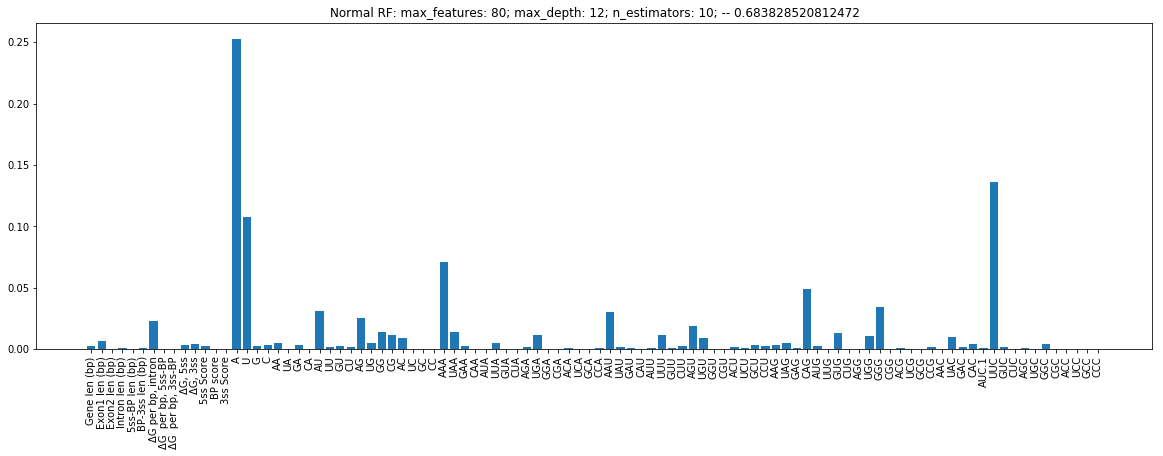

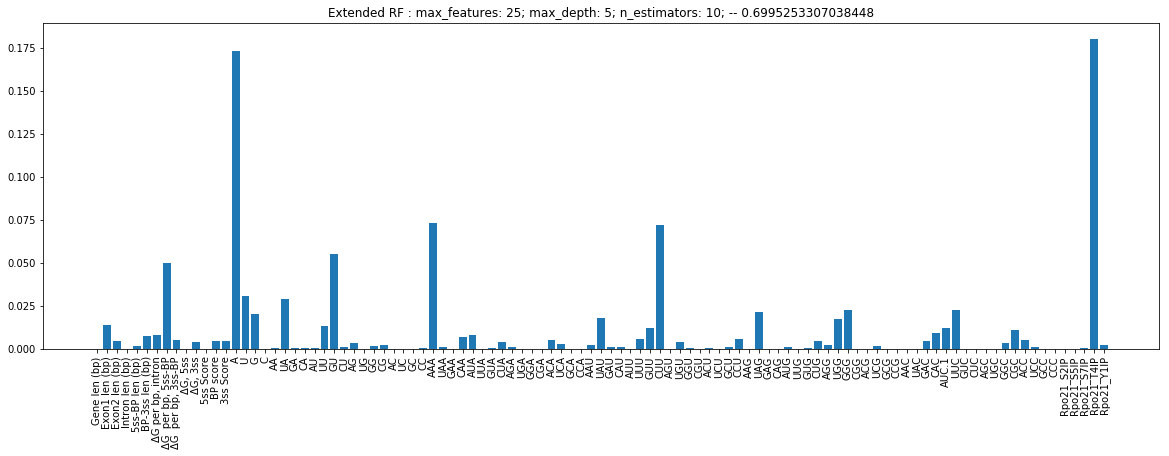

In [18]:
best_RFs(results_1_rp,results_2_rp,'rp')

Normal best: 0.683828520812472 | max_features: 80; max_depth: 12; n_estimators: 10;
Extended best: 0.6995253307038448 | max_features: 25; max_depth: 5; n_estimators: 10;
Best difference: 0.178522036722764 | max_features: 7; max_depth: 5; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.3526340326994295
Mean squared error:               0.03376319974358975
Mean absolute error:              0.13876153846153846
Root mean squared error:          0.18374765234851234
Correlation Coefficient:          0.5972822538667238


Extended feature space
Coefficient of determination R^2: 0.32708078033033505
Mean squared error:               0.03509592282051282
Mean absolute error:              0.14166068376068375
Root mean squared error:          0.18733905844887985
Correlation Coefficient:          0.5756356719726347

# Non-RP Genes

In [20]:
X,y,X2,y2 = get_data('nrp')

mxf = [5,7,10,12,15,18,20,25,30,50,80,10]
md = [5,7,10,12,15,18,20]
n_est = [10,20,30,40,50,60,80,90,100,120,140,160]

results_1_nrp = np.zeros((len(mxf),len(md),len(n_est)))
results_2_nrp = np.zeros((len(mxf),len(md),len(n_est)))

f = FloatProgress(min=0, max=(len(mxf)*len(md)*len(n_est)))
display(f)


i = 0
for max_features in mxf:
    j = 0
    for max_depth in md:
        k = 0
        for n_estimators in n_est:            
            
            kf = KFold(n_splits=5,shuffle=True,random_state=0)

            rfr1 = RandomForestRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            rfr2 = RandomForestRegressor(n_estimators=n_estimators, 
                                        criterion='mse', 
                                        max_features=max_features, 
                                        max_depth=max_depth, 
                                        n_jobs=2,
                                        random_state=1337)

            predictions_rfr1 = cross_val_predict(rfr1,X=X,y=y,cv=kf)
            predictions_rfr2 = cross_val_predict(rfr2,X=X2,y=y2,cv=kf)
            
            print('max_features: {}; max_depth: {}; n_estimators: {};\n'.format(max_features,max_depth,n_estimators))

            print('Normal feature space')
            print_stats(y, predictions_rfr1)
            print('\n')
            print('Extended feature space')
            print_stats(y2, predictions_rfr2)
            print('-------------------------------------------------------\n')
            

            results_1_nrp[i][j][k]=np.corrcoef(y, predictions_rfr1)[0][1]
            results_2_nrp[i][j][k]=np.corrcoef(y2, predictions_rfr2)[0][1]
            
            f.value += 1
            
            k += 1
        j += 1
    i += 1

FloatProgress(value=0.0, max=1008.0)

max_features: 5; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17288754205125412
Mean squared error:               0.06861558845509945
Mean absolute error:              0.2250189466089466
Root mean squared error:          0.2619457738828772
Correlation Coefficient:          0.0002636896991727214


Extended feature space
Coefficient of determination R^2: -0.07264862214631762
Mean squared error:               0.06275146915227865
Mean absolute error:              0.20320011063011065
Root mean squared error:          0.2505024334258625
Correlation Coefficient:          0.03260708413153398
-------------------------------------------------------

max_features: 5; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.13129749163720428
Mean squared error:               0.06618251138613646
Mean absolute error:              0.21443225108225109
Root mean squared error:          0.25725961864648805
Correlation Coeffi

max_features: 5; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.12572324353588749
Mean squared error:               0.06585640994848485
Mean absolute error:              0.21700545454545453
Root mean squared error:          0.2566250376492614
Correlation Coefficient:          0.05168129990299998


Extended feature space
Coefficient of determination R^2: -0.007691448180237925
Mean squared error:               0.058951382139445466
Mean absolute error:              0.20166063492063493
Root mean squared error:          0.2427990571222332
Correlation Coefficient:          0.14177027803196318
-------------------------------------------------------

max_features: 5; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.12988074022855423
Mean squared error:               0.06609962941483587
Mean absolute error:              0.2172927525252525
Root mean squared error:          0.25709848193802287
Correlation Coeffi

max_features: 5; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17383418104412773
Mean squared error:               0.06867096818181816
Mean absolute error:              0.2216939393939394
Root mean squared error:          0.2620514609419649
Correlation Coefficient:          0.0036663606349908303


Extended feature space
Coefficient of determination R^2: -0.00808224386344425
Mean squared error:               0.05897424424242425
Mean absolute error:              0.1993090909090909
Root mean squared error:          0.24284613285457984
Correlation Coefficient:          0.1344560870291538
-------------------------------------------------------

max_features: 5; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.15441477565231132
Mean squared error:               0.06753490536195288
Mean absolute error:              0.21969141414141413
Root mean squared error:          0.2598747878535986
Correlation Coeffi

max_features: 5; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17383418104412773
Mean squared error:               0.06867096818181816
Mean absolute error:              0.2216939393939394
Root mean squared error:          0.2620514609419649
Correlation Coefficient:          0.003666360634990786


Extended feature space
Coefficient of determination R^2: -0.00808224386344425
Mean squared error:               0.05897424424242425
Mean absolute error:              0.1993090909090909
Root mean squared error:          0.24284613285457984
Correlation Coefficient:          0.1344560870291538
-------------------------------------------------------

max_features: 5; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.15442339266932215
Mean squared error:               0.06753540946969698
Mean absolute error:              0.21969242424242422
Root mean squared error:          0.25987575775685
Correlation Coefficie

max_features: 5; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17383418104412773
Mean squared error:               0.06867096818181816
Mean absolute error:              0.22169393939393936
Root mean squared error:          0.2620514609419649
Correlation Coefficient:          0.003666360634990818


Extended feature space
Coefficient of determination R^2: -0.00808224386344425
Mean squared error:               0.05897424424242425
Mean absolute error:              0.1993090909090909
Root mean squared error:          0.24284613285457984
Correlation Coefficient:          0.1344560870291538
-------------------------------------------------------

max_features: 5; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.15442339266932215
Mean squared error:               0.06753540946969698
Mean absolute error:              0.21969242424242422
Root mean squared error:          0.25987575775685
Correlation Coeffici

max_features: 5; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17383418104412773
Mean squared error:               0.06867096818181816
Mean absolute error:              0.2216939393939394
Root mean squared error:          0.2620514609419649
Correlation Coefficient:          0.0036663606349907844


Extended feature space
Coefficient of determination R^2: -0.00808224386344425
Mean squared error:               0.05897424424242425
Mean absolute error:              0.1993090909090909
Root mean squared error:          0.24284613285457984
Correlation Coefficient:          0.1344560870291538
-------------------------------------------------------

max_features: 5; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.15442339266932192
Mean squared error:               0.06753540946969697
Mean absolute error:              0.21969242424242422
Root mean squared error:          0.25987575775684996
Correlation Coeff

max_features: 5; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17383418104412773
Mean squared error:               0.06867096818181816
Mean absolute error:              0.2216939393939394
Root mean squared error:          0.2620514609419649
Correlation Coefficient:          0.0036663606349907844


Extended feature space
Coefficient of determination R^2: -0.00808224386344425
Mean squared error:               0.05897424424242425
Mean absolute error:              0.1993090909090909
Root mean squared error:          0.24284613285457984
Correlation Coefficient:          0.1344560870291538
-------------------------------------------------------

max_features: 5; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.15442339266932215
Mean squared error:               0.06753540946969698
Mean absolute error:              0.21969242424242424
Root mean squared error:          0.25987575775685
Correlation Coeffici

max_features: 7; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.13407811096468758
Mean squared error:               0.06634518156941013
Mean absolute error:              0.21575463733236458
Root mean squared error:          0.2575755841872636
Correlation Coefficient:          0.04284964015347914


Extended feature space
Coefficient of determination R^2: -0.17172355923423566
Mean squared error:               0.06854749380571673
Mean absolute error:              0.2221727441077441
Root mean squared error:          0.261815763096336
Correlation Coefficient:          0.017617727710119893
-------------------------------------------------------

max_features: 7; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.03655359913728762
Mean squared error:               0.05636298397758394
Mean absolute error:              0.1940438524564661
Root mean squared error:          0.23740889616352615
Correlation Coefficien

max_features: 7; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.13574728164490923
Mean squared error:               0.06644283042690853
Mean absolute error:              0.21443642135642135
Root mean squared error:          0.25776506828293966
Correlation Coefficient:          -0.026456728948254023


Extended feature space
Coefficient of determination R^2: -0.2083414460235593
Mean squared error:               0.07068969223476429
Mean absolute error:              0.2262360101010101
Root mean squared error:          0.2658753321291095
Correlation Coefficient:          -0.028532653764229938
-------------------------------------------------------

max_features: 7; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.03223425966177862
Mean squared error:               0.06038717149841786
Mean absolute error:              0.2040400793650794
Root mean squared error:          0.24573801394659692
Correlation Coeff

max_features: 7; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15293097490602747
Mean squared error:               0.0674481009090909
Mean absolute error:              0.21539696969696964
Root mean squared error:          0.2597077220821339
Correlation Coefficient:          -0.06060313747608158


Extended feature space
Coefficient of determination R^2: -0.20379275378206518
Mean squared error:               0.07042358727272725
Mean absolute error:              0.2261939393939394
Root mean squared error:          0.26537442844540854
Correlation Coefficient:          -0.022659828307684086
-------------------------------------------------------

max_features: 7; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.021953870019687294
Mean squared error:               0.05978575409090909
Mean absolute error:              0.20285454545454545
Root mean squared error:          0.24451125555055556
Correlation Co

max_features: 7; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15293097490602747
Mean squared error:               0.0674481009090909
Mean absolute error:              0.21539696969696964
Root mean squared error:          0.2597077220821339
Correlation Coefficient:          -0.06060313747608158


Extended feature space
Coefficient of determination R^2: -0.20379275378206518
Mean squared error:               0.07042358727272725
Mean absolute error:              0.2261939393939394
Root mean squared error:          0.26537442844540854
Correlation Coefficient:          -0.022659828307684187
-------------------------------------------------------

max_features: 7; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.021953870019687516
Mean squared error:               0.059785754090909096
Mean absolute error:              0.20285454545454545
Root mean squared error:          0.24451125555055558
Correlation C

max_features: 7; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15293097490602747
Mean squared error:               0.0674481009090909
Mean absolute error:              0.21539696969696964
Root mean squared error:          0.2597077220821339
Correlation Coefficient:          -0.06060313747608162


Extended feature space
Coefficient of determination R^2: -0.20379275378206518
Mean squared error:               0.07042358727272725
Mean absolute error:              0.2261939393939394
Root mean squared error:          0.26537442844540854
Correlation Coefficient:          -0.022659828307684152
-------------------------------------------------------

max_features: 7; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.021953870019687294
Mean squared error:               0.05978575409090909
Mean absolute error:              0.20285454545454545
Root mean squared error:          0.24451125555055556
Correlation Co

max_features: 7; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15293097490602725
Mean squared error:               0.06744810090909088
Mean absolute error:              0.21539696969696964
Root mean squared error:          0.2597077220821339
Correlation Coefficient:          -0.060603137476081516


Extended feature space
Coefficient of determination R^2: -0.20379275378206518
Mean squared error:               0.07042358727272725
Mean absolute error:              0.2261939393939394
Root mean squared error:          0.26537442844540854
Correlation Coefficient:          -0.022659828307684152
-------------------------------------------------------

max_features: 7; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.021953870019687294
Mean squared error:               0.05978575409090909
Mean absolute error:              0.20285454545454545
Root mean squared error:          0.24451125555055556
Correlation 

max_features: 7; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15293097490602747
Mean squared error:               0.0674481009090909
Mean absolute error:              0.21539696969696964
Root mean squared error:          0.2597077220821339
Correlation Coefficient:          -0.06060313747608158


Extended feature space
Coefficient of determination R^2: -0.20379275378206518
Mean squared error:               0.07042358727272725
Mean absolute error:              0.2261939393939394
Root mean squared error:          0.26537442844540854
Correlation Coefficient:          -0.022659828307684152
-------------------------------------------------------

max_features: 7; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.021953870019687294
Mean squared error:               0.05978575409090909
Mean absolute error:              0.20285454545454545
Root mean squared error:          0.24451125555055556
Correlation Co

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.13649873753430186
Mean squared error:               0.06648679166462323
Mean absolute error:              0.21880609910291726
Root mean squared error:          0.2578503280289231
Correlation Coefficient:          0.07953241678715088


Extended feature space
Coefficient of determination R^2: -0.18707827285964362
Mean squared error:               0.06944576637933816
Mean absolute error:              0.23492970177970174
Root mean squared error:          0.2635256465305382
Correlation Coefficient:          -0.006866493545687503
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.0023886612923925687
Mean squared error:               0.058361681406545914
Mean absolute error:              0.20110416427007338
Root mean squared error:          0.2415816247286741
Correlation Co

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.1503411316132568
Mean squared error:               0.06729659139503368
Mean absolute error:              0.21348035353535355
Root mean squared error:          0.2594158657349887
Correlation Coefficient:          0.04335947198099186


Extended feature space
Coefficient of determination R^2: -0.1918221316665516
Mean squared error:               0.06972328886287878
Mean absolute error:              0.22893530303030302
Root mean squared error:          0.2640516783943605
Correlation Coefficient:          -0.010322212153447892
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.010019453663019373
Mean squared error:               0.05908757376941911
Mean absolute error:              0.1973708044733045
Root mean squared error:          0.24307935693805657
Correlation Coeff

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.04354204709600545


Extended feature space
Coefficient of determination R^2: -0.1967159197845776
Mean squared error:               0.07000958242424243
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.2645932395664002
Correlation Coefficient:          -0.010327939027464608
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.19760757575757576
Root mean squared error:          0.2435870289687408
Correlation Coe

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.043542047096005516


Extended feature space
Coefficient of determination R^2: -0.1967159197845776
Mean squared error:               0.07000958242424243
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.2645932395664002
Correlation Coefficient:          -0.010327939027464607
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.19760757575757576
Root mean squared error:          0.2435870289687408
Correlation Co

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.043542047096005516


Extended feature space
Coefficient of determination R^2: -0.1967159197845776
Mean squared error:               0.07000958242424243
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.2645932395664002
Correlation Coefficient:          -0.01032793902746467
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.19760757575757576
Root mean squared error:          0.2435870289687408
Correlation Coe

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.043542047096005516


Extended feature space
Coefficient of determination R^2: -0.1967159197845776
Mean squared error:               0.07000958242424243
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.2645932395664002
Correlation Coefficient:          -0.01032793902746467
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.19760757575757576
Root mean squared error:          0.2435870289687408
Correlation Coe

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.043542047096005516


Extended feature space
Coefficient of determination R^2: -0.1967159197845776
Mean squared error:               0.07000958242424243
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.2645932395664002
Correlation Coefficient:          -0.01032793902746467
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.19760757575757576
Root mean squared error:          0.2435870289687408
Correlation Coe

max_features: 12; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.1272558938056978
Mean squared error:               0.06594607216791212
Mean absolute error:              0.20953935786435787
Root mean squared error:          0.25679967322392006
Correlation Coefficient:          0.07948334542928917


Extended feature space
Coefficient of determination R^2: -0.3033784434935842
Mean squared error:               0.0762494916806745
Mean absolute error:              0.23263133116883117
Root mean squared error:          0.2761331050067603
Correlation Coefficient:          -0.14710998297516753
-------------------------------------------------------

max_features: 12; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.010759967121893421
Mean squared error:               0.059130894859393934
Mean absolute error:              0.19878984427609425
Root mean squared error:          0.24316844955584582
Correlation Coef

max_features: 12; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15972347401278575
Mean squared error:               0.06784547176228954
Mean absolute error:              0.21641090909090907
Root mean squared error:          0.2604716333159708
Correlation Coefficient:          0.05546937118670632


Extended feature space
Coefficient of determination R^2: -0.3845123090219049
Mean squared error:               0.08099593814486532
Mean absolute error:              0.23983681818181818
Root mean squared error:          0.2845978533736074
Correlation Coefficient:          -0.22699332976268052
-------------------------------------------------------

max_features: 12; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.05686236662490973
Mean squared error:               0.06182795076430977
Mean absolute error:              0.20341848484848485
Root mean squared error:          0.2486522687696812
Correlation Coeffi

max_features: 12; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17191293272711783
Mean squared error:               0.0685585724242424
Mean absolute error:              0.2158454545454545
Root mean squared error:          0.2618369195209919
Correlation Coefficient:          0.03827582554186387


Extended feature space
Coefficient of determination R^2: -0.35091549846261194
Mean squared error:               0.07903047696969696
Mean absolute error:              0.23812727272727274
Root mean squared error:          0.28112359731921643
Correlation Coefficient:          -0.21226998249446155
-------------------------------------------------------

max_features: 12; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.055832915999874944
Mean squared error:               0.06176772643939394
Mean absolute error:              0.20343484848484847
Root mean squared error:          0.24853113776626448
Correlation Co

max_features: 12; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17191293272711783
Mean squared error:               0.0685585724242424
Mean absolute error:              0.21584545454545453
Root mean squared error:          0.2618369195209919
Correlation Coefficient:          0.03827582554186386


Extended feature space
Coefficient of determination R^2: -0.35091549846261194
Mean squared error:               0.07903047696969696
Mean absolute error:              0.23812727272727274
Root mean squared error:          0.28112359731921643
Correlation Coefficient:          -0.21226998249446155
-------------------------------------------------------

max_features: 12; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.05583291599987472
Mean squared error:               0.061767726439393926
Mean absolute error:              0.20343484848484847
Root mean squared error:          0.24853113776626445
Correlation C

max_features: 12; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17191293272711783
Mean squared error:               0.0685585724242424
Mean absolute error:              0.2158454545454545
Root mean squared error:          0.2618369195209919
Correlation Coefficient:          0.03827582554186387


Extended feature space
Coefficient of determination R^2: -0.35091549846261194
Mean squared error:               0.07903047696969696
Mean absolute error:              0.23812727272727274
Root mean squared error:          0.28112359731921643
Correlation Coefficient:          -0.21226998249446158
-------------------------------------------------------

max_features: 12; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.055832915999874944
Mean squared error:               0.06176772643939394
Mean absolute error:              0.20343484848484847
Root mean squared error:          0.24853113776626448
Correlation Co

max_features: 12; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17191293272711783
Mean squared error:               0.0685585724242424
Mean absolute error:              0.21584545454545453
Root mean squared error:          0.2618369195209919
Correlation Coefficient:          0.03827582554186389


Extended feature space
Coefficient of determination R^2: -0.35091549846261194
Mean squared error:               0.07903047696969696
Mean absolute error:              0.23812727272727274
Root mean squared error:          0.28112359731921643
Correlation Coefficient:          -0.21226998249446155
-------------------------------------------------------

max_features: 12; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.05583291599987472
Mean squared error:               0.061767726439393926
Mean absolute error:              0.20343484848484847
Root mean squared error:          0.24853113776626445
Correlation C

max_features: 12; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.17191293272711783
Mean squared error:               0.0685585724242424
Mean absolute error:              0.2158454545454545
Root mean squared error:          0.2618369195209919
Correlation Coefficient:          0.03827582554186388


Extended feature space
Coefficient of determination R^2: -0.35091549846261194
Mean squared error:               0.07903047696969696
Mean absolute error:              0.23812727272727274
Root mean squared error:          0.28112359731921643
Correlation Coefficient:          -0.21226998249446155
-------------------------------------------------------

max_features: 12; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.055832915999874944
Mean squared error:               0.06176772643939394
Mean absolute error:              0.20343484848484847
Root mean squared error:          0.24853113776626448
Correlation Co

max_features: 15; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.011907842192125484
Mean squared error:               0.0578047957925139
Mean absolute error:              0.1982938814552451
Root mean squared error:          0.24042627933009716
Correlation Coefficient:          0.23106760115347985


Extended feature space
Coefficient of determination R^2: -0.0003789715916291403
Mean squared error:               0.058523591864417024
Mean absolute error:              0.20014185185185188
Root mean squared error:          0.24191649771029883
Correlation Coefficient:          0.24315546099980276
-------------------------------------------------------

max_features: 15; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.010144407420981882
Mean squared error:               0.057907959233326464
Mean absolute error:              0.19363402826971007
Root mean squared error:          0.24064072646442553
Correlation C

max_features: 15; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.021672820768787848
Mean squared error:               0.05723353066498316
Mean absolute error:              0.19719646464646462
Root mean squared error:          0.23923530396867257
Correlation Coefficient:          0.24521957223578608


Extended feature space
Coefficient of determination R^2: -0.04081353642975616
Mean squared error:               0.06088907138468012
Mean absolute error:              0.2039131313131313
Root mean squared error:          0.24675711009954732
Correlation Coefficient:          0.1877877413689927
-------------------------------------------------------

max_features: 15; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.03488385130452165
Mean squared error:               0.056460666599326595
Mean absolute error:              0.19152979797979794
Root mean squared error:          0.23761453364499108
Correlation Coeff

max_features: 15; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02146247723678496
Mean squared error:               0.05724583606060605
Mean absolute error:              0.197130303030303
Root mean squared error:          0.23926102077147052
Correlation Coefficient:          0.24113235963299853


Extended feature space
Coefficient of determination R^2: -0.05217605458575658
Mean squared error:               0.06155379484848485
Mean absolute error:              0.2045969696969697
Root mean squared error:          0.2481003725279042
Correlation Coefficient:          0.1748101803679758
-------------------------------------------------------

max_features: 15; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.03387122518649477
Mean squared error:               0.05651990666666665
Mean absolute error:              0.19288484848484844
Root mean squared error:          0.2377391567804232
Correlation Coefficie

max_features: 15; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02146247723678496
Mean squared error:               0.05724583606060605
Mean absolute error:              0.197130303030303
Root mean squared error:          0.23926102077147052
Correlation Coefficient:          0.24113235963299853


Extended feature space
Coefficient of determination R^2: -0.05217605458575658
Mean squared error:               0.06155379484848485
Mean absolute error:              0.2045969696969697
Root mean squared error:          0.2481003725279042
Correlation Coefficient:          0.17481018036797585
-------------------------------------------------------

max_features: 15; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.03387122518649455
Mean squared error:               0.05651990666666666
Mean absolute error:              0.19288484848484844
Root mean squared error:          0.23773915678042323
Correlation Coeffic

max_features: 15; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02146247723678496
Mean squared error:               0.05724583606060605
Mean absolute error:              0.197130303030303
Root mean squared error:          0.23926102077147052
Correlation Coefficient:          0.24113235963299853


Extended feature space
Coefficient of determination R^2: -0.05217605458575658
Mean squared error:               0.06155379484848485
Mean absolute error:              0.2045969696969697
Root mean squared error:          0.2481003725279042
Correlation Coefficient:          0.17481018036797585
-------------------------------------------------------

max_features: 15; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.033871225186494436
Mean squared error:               0.05651990666666667
Mean absolute error:              0.19288484848484844
Root mean squared error:          0.23773915678042326
Correlation Coeffi

max_features: 15; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02146247723678496
Mean squared error:               0.05724583606060605
Mean absolute error:              0.197130303030303
Root mean squared error:          0.23926102077147052
Correlation Coefficient:          0.24113235963299853


Extended feature space
Coefficient of determination R^2: -0.05217605458575658
Mean squared error:               0.06155379484848485
Mean absolute error:              0.2045969696969697
Root mean squared error:          0.2481003725279042
Correlation Coefficient:          0.17481018036797585
-------------------------------------------------------

max_features: 15; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.033871225186494436
Mean squared error:               0.05651990666666667
Mean absolute error:              0.19288484848484844
Root mean squared error:          0.23773915678042326
Correlation Coeffi

max_features: 15; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02146247723678496
Mean squared error:               0.05724583606060605
Mean absolute error:              0.197130303030303
Root mean squared error:          0.23926102077147052
Correlation Coefficient:          0.24113235963299853


Extended feature space
Coefficient of determination R^2: -0.05217605458575658
Mean squared error:               0.06155379484848485
Mean absolute error:              0.2045969696969697
Root mean squared error:          0.2481003725279042
Correlation Coefficient:          0.17481018036797588
-------------------------------------------------------

max_features: 15; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.03387122518649455
Mean squared error:               0.05651990666666666
Mean absolute error:              0.19288484848484846
Root mean squared error:          0.23773915678042323
Correlation Coeffic

max_features: 18; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.2297978621692316
Mean squared error:               0.07194492307931567
Mean absolute error:              0.21897435425685421
Root mean squared error:          0.26822550788341454
Correlation Coefficient:          -0.02574699492671481


Extended feature space
Coefficient of determination R^2: -0.2269059805202127
Mean squared error:               0.07177574389207417
Mean absolute error:              0.23363554593554592
Root mean squared error:          0.26790995482078334
Correlation Coefficient:          0.053570334145761525
-------------------------------------------------------

max_features: 18; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.040190214504479904
Mean squared error:               0.060852606166007066
Mean absolute error:              0.20316781385281385
Root mean squared error:          0.24668321014209108
Correlation C

max_features: 18; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.2202320588843294
Mean squared error:               0.07138530998947812
Mean absolute error:              0.21555025252525253
Root mean squared error:          0.267180294912402
Correlation Coefficient:          -0.014970688100789277


Extended feature space
Coefficient of determination R^2: -0.24267979747956425
Mean squared error:               0.07269853460648149
Mean absolute error:              0.2324659090909091
Root mean squared error:          0.26962665781869843
Correlation Coefficient:          0.0011738288421001425
-------------------------------------------------------

max_features: 18; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.07475396436651272
Mean squared error:               0.06287463466487794
Mean absolute error:              0.20412714646464644
Root mean squared error:          0.2507481498732901
Correlation Coef

max_features: 18; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.21797545500059923
Mean squared error:               0.07125329545454546
Mean absolute error:              0.21622121212121212
Root mean squared error:          0.2669331291813466
Correlation Coefficient:          -0.012951741054234396


Extended feature space
Coefficient of determination R^2: -0.24413494367305066
Mean squared error:               0.07278366272727273
Mean absolute error:              0.2329363636363636
Root mean squared error:          0.26978447458531174
Correlation Coefficient:          0.009544466349996283
-------------------------------------------------------

max_features: 18; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.07508796741818258
Mean squared error:               0.06289417431818183
Mean absolute error:              0.20459242424242421
Root mean squared error:          0.25078710955346534
Correlation 

max_features: 18; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.21797545500059923
Mean squared error:               0.07125329545454546
Mean absolute error:              0.21622121212121212
Root mean squared error:          0.2669331291813466
Correlation Coefficient:          -0.012951741054234396


Extended feature space
Coefficient of determination R^2: -0.24413494367305066
Mean squared error:               0.07278366272727273
Mean absolute error:              0.23293636363636364
Root mean squared error:          0.26978447458531174
Correlation Coefficient:          0.009544466349996254
-------------------------------------------------------

max_features: 18; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.07508796741818258
Mean squared error:               0.06289417431818183
Mean absolute error:              0.20459242424242421
Root mean squared error:          0.25078710955346534
Correlation

max_features: 18; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.21797545500059923
Mean squared error:               0.07125329545454546
Mean absolute error:              0.21622121212121212
Root mean squared error:          0.2669331291813466
Correlation Coefficient:          -0.012951741054234396


Extended feature space
Coefficient of determination R^2: -0.24413494367305066
Mean squared error:               0.07278366272727273
Mean absolute error:              0.23293636363636364
Root mean squared error:          0.26978447458531174
Correlation Coefficient:          0.009544466349996283
-------------------------------------------------------

max_features: 18; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.07508796741818258
Mean squared error:               0.06289417431818183
Mean absolute error:              0.20459242424242424
Root mean squared error:          0.25078710955346534
Correlation

max_features: 18; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.21797545500059923
Mean squared error:               0.07125329545454546
Mean absolute error:              0.21622121212121212
Root mean squared error:          0.2669331291813466
Correlation Coefficient:          -0.012951741054234396


Extended feature space
Coefficient of determination R^2: -0.24413494367305066
Mean squared error:               0.07278366272727273
Mean absolute error:              0.23293636363636364
Root mean squared error:          0.26978447458531174
Correlation Coefficient:          0.009544466349996205
-------------------------------------------------------

max_features: 18; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.07508796741818258
Mean squared error:               0.06289417431818183
Mean absolute error:              0.20459242424242424
Root mean squared error:          0.25078710955346534
Correlation

max_features: 18; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.21797545500059923
Mean squared error:               0.07125329545454546
Mean absolute error:              0.21622121212121212
Root mean squared error:          0.2669331291813466
Correlation Coefficient:          -0.012951741054234349


Extended feature space
Coefficient of determination R^2: -0.24413494367305044
Mean squared error:               0.07278366272727271
Mean absolute error:              0.23293636363636364
Root mean squared error:          0.26978447458531174
Correlation Coefficient:          0.009544466349996283
-------------------------------------------------------

max_features: 18; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.07508796741818258
Mean squared error:               0.06289417431818183
Mean absolute error:              0.20459242424242421
Root mean squared error:          0.25078710955346534
Correlation

max_features: 20; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.012582987711104998
Mean squared error:               0.05776529881994261
Mean absolute error:              0.19704782828282827
Root mean squared error:          0.24034412582782758
Correlation Coefficient:          0.2508101780564811


Extended feature space
Coefficient of determination R^2: 0.03836936758288367
Mean squared error:               0.05625675894242423
Mean absolute error:              0.19370070707070708
Root mean squared error:          0.23718507318637114
Correlation Coefficient:          0.2589907544368653
-------------------------------------------------------

max_features: 20; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.07940497101329469
Mean squared error:               0.05385611781014363
Mean absolute error:              0.1934093272005772
Root mean squared error:          0.23206920909535506
Correlation Coeffici

max_features: 20; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.008286119293750671
Mean squared error:               0.05801667173030303
Mean absolute error:              0.2000087878787879
Root mean squared error:          0.2408665018849716
Correlation Coefficient:          0.25921328634956314


Extended feature space
Coefficient of determination R^2: -0.10728790990687154
Mean squared error:               0.0647779167255892
Mean absolute error:              0.20668838383838384
Root mean squared error:          0.2545150618835538
Correlation Coefficient:          0.1298259153486185
-------------------------------------------------------

max_features: 20; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.049977594158773564
Mean squared error:               0.05557766118678451
Mean absolute error:              0.19723823232323234
Root mean squared error:          0.23574914885696727
Correlation Coeffici

max_features: 20; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.003582218529125214
Mean squared error:               0.05871098636363636
Mean absolute error:              0.20096666666666663
Root mean squared error:          0.24230350051874272
Correlation Coefficient:          0.25207361919670535


Extended feature space
Coefficient of determination R^2: -0.09667535662056381
Mean squared error:               0.06415706727272727
Mean absolute error:              0.20526060606060603
Root mean squared error:          0.25329245403826633
Correlation Coefficient:          0.13211027258640384
-------------------------------------------------------

max_features: 20; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.034905228810337974
Mean squared error:               0.056459415984848486
Mean absolute error:              0.1989863636363636
Root mean squared error:          0.23761190202691548
Correlation 

max_features: 20; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.003582218529125214
Mean squared error:               0.05871098636363636
Mean absolute error:              0.20096666666666663
Root mean squared error:          0.24230350051874272
Correlation Coefficient:          0.25207361919670535


Extended feature space
Coefficient of determination R^2: -0.09667535662056381
Mean squared error:               0.06415706727272727
Mean absolute error:              0.20526060606060603
Root mean squared error:          0.25329245403826633
Correlation Coefficient:          0.13211027258640384
-------------------------------------------------------

max_features: 20; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.03490522881033786
Mean squared error:               0.05645941598484849
Mean absolute error:              0.19898636363636363
Root mean squared error:          0.2376119020269155
Correlation Co

max_features: 20; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.003582218529125214
Mean squared error:               0.05871098636363636
Mean absolute error:              0.20096666666666663
Root mean squared error:          0.24230350051874272
Correlation Coefficient:          0.2520736191967054


Extended feature space
Coefficient of determination R^2: -0.09667535662056381
Mean squared error:               0.06415706727272727
Mean absolute error:              0.20526060606060603
Root mean squared error:          0.25329245403826633
Correlation Coefficient:          0.13211027258640384
-------------------------------------------------------

max_features: 20; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.034905228810337974
Mean squared error:               0.056459415984848486
Mean absolute error:              0.1989863636363636
Root mean squared error:          0.23761190202691548
Correlation C

max_features: 20; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.003582218529125214
Mean squared error:               0.05871098636363636
Mean absolute error:              0.20096666666666663
Root mean squared error:          0.24230350051874272
Correlation Coefficient:          0.25207361919670535


Extended feature space
Coefficient of determination R^2: -0.09667535662056381
Mean squared error:               0.06415706727272727
Mean absolute error:              0.20526060606060606
Root mean squared error:          0.25329245403826633
Correlation Coefficient:          0.13211027258640384
-------------------------------------------------------

max_features: 20; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.03490522881033786
Mean squared error:               0.05645941598484849
Mean absolute error:              0.19898636363636363
Root mean squared error:          0.2376119020269155
Correlation Co

max_features: 20; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.003582218529125214
Mean squared error:               0.05871098636363636
Mean absolute error:              0.20096666666666663
Root mean squared error:          0.24230350051874272
Correlation Coefficient:          0.25207361919670535


Extended feature space
Coefficient of determination R^2: -0.09667535662056381
Mean squared error:               0.06415706727272727
Mean absolute error:              0.20526060606060603
Root mean squared error:          0.25329245403826633
Correlation Coefficient:          0.13211027258640384
-------------------------------------------------------

max_features: 20; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.034905228810337974
Mean squared error:               0.056459415984848486
Mean absolute error:              0.1989863636363636
Root mean squared error:          0.23761190202691548
Correlation 

max_features: 25; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.04044920415367537
Mean squared error:               0.056135085546571026
Mean absolute error:              0.20009925574425574
Root mean squared error:          0.23692843971666008
Correlation Coefficient:          0.296990176417737


Extended feature space
Coefficient of determination R^2: 0.002292584230415784
Mean squared error:               0.058367302051243915
Mean absolute error:              0.20143776094276095
Root mean squared error:          0.2415932574622974
Correlation Coefficient:          0.20420441323658925
-------------------------------------------------------

max_features: 25; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.013478638293097811
Mean squared error:               0.05771290198773983
Mean absolute error:              0.19983568306693306
Root mean squared error:          0.2402350973270555
Correlation Coeffi

max_features: 25; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.03929337191694604
Mean squared error:               0.05620270337542088
Mean absolute error:              0.1977530303030303
Root mean squared error:          0.23707109350450317
Correlation Coefficient:          0.2821592631629285


Extended feature space
Coefficient of determination R^2: 0.06831615053564344
Mean squared error:               0.05450482957070706
Mean absolute error:              0.19448737373737374
Root mean squared error:          0.23346269417340978
Correlation Coefficient:          0.2799510540679304
-------------------------------------------------------

max_features: 25; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.006261125664609568
Mean squared error:               0.05813513673611112
Mean absolute error:              0.19816489898989903
Root mean squared error:          0.2411122907197207
Correlation Coefficie

max_features: 25; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.03194321194709959
Mean squared error:               0.05663269818181818
Mean absolute error:              0.1980242424242424
Root mean squared error:          0.2379762555000355
Correlation Coefficient:          0.2729137246338398


Extended feature space
Coefficient of determination R^2: 0.06403862993887377
Mean squared error:               0.054755070606060594
Mean absolute error:              0.1951969696969697
Root mean squared error:          0.23399801410708723
Correlation Coefficient:          0.2745509048118549
-------------------------------------------------------

max_features: 25; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.0004097512923324498
Mean squared error:               0.058477450454545464
Mean absolute error:              0.1987151515151515
Root mean squared error:          0.2418211125078732
Correlation Coeffic

max_features: 25; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.03194321194709937
Mean squared error:               0.056632698181818195
Mean absolute error:              0.1980242424242424
Root mean squared error:          0.23797625550003554
Correlation Coefficient:          0.27291372463383967


Extended feature space
Coefficient of determination R^2: 0.06403862993887377
Mean squared error:               0.054755070606060594
Mean absolute error:              0.1951969696969697
Root mean squared error:          0.23399801410708723
Correlation Coefficient:          0.27455090481185485
-------------------------------------------------------

max_features: 25; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.00040975129233233876
Mean squared error:               0.05847745045454547
Mean absolute error:              0.19871515151515154
Root mean squared error:          0.2418211125078732
Correlation Co

max_features: 25; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.03194321194709948
Mean squared error:               0.05663269818181819
Mean absolute error:              0.1980242424242424
Root mean squared error:          0.2379762555000355
Correlation Coefficient:          0.2729137246338398


Extended feature space
Coefficient of determination R^2: 0.06403862993887377
Mean squared error:               0.054755070606060594
Mean absolute error:              0.1951969696969697
Root mean squared error:          0.23399801410708723
Correlation Coefficient:          0.2745509048118549
-------------------------------------------------------

max_features: 25; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.00040975129233233876
Mean squared error:               0.05847745045454547
Mean absolute error:              0.1987151515151515
Root mean squared error:          0.2418211125078732
Correlation Coeffic

max_features: 25; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.03194321194709937
Mean squared error:               0.056632698181818195
Mean absolute error:              0.1980242424242424
Root mean squared error:          0.23797625550003554
Correlation Coefficient:          0.27291372463383967


Extended feature space
Coefficient of determination R^2: 0.06403862993887377
Mean squared error:               0.054755070606060594
Mean absolute error:              0.1951969696969697
Root mean squared error:          0.23399801410708723
Correlation Coefficient:          0.27455090481185485
-------------------------------------------------------

max_features: 25; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.00040975129233233876
Mean squared error:               0.05847745045454547
Mean absolute error:              0.1987151515151515
Root mean squared error:          0.2418211125078732
Correlation Coe

max_features: 25; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.03194321194709959
Mean squared error:               0.05663269818181818
Mean absolute error:              0.1980242424242424
Root mean squared error:          0.2379762555000355
Correlation Coefficient:          0.2729137246338398


Extended feature space
Coefficient of determination R^2: 0.06403862993887377
Mean squared error:               0.054755070606060594
Mean absolute error:              0.1951969696969697
Root mean squared error:          0.23399801410708723
Correlation Coefficient:          0.27455090481185485
-------------------------------------------------------

max_features: 25; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.0004097512923324498
Mean squared error:               0.058477450454545464
Mean absolute error:              0.1987151515151515
Root mean squared error:          0.2418211125078732
Correlation Coeffi

max_features: 30; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.027441787559062236
Mean squared error:               0.05689603790723733
Mean absolute error:              0.20240517316017312
Root mean squared error:          0.23852890371449187
Correlation Coefficient:          0.2359945214261616


Extended feature space
Coefficient of determination R^2: 0.05583875598231536
Mean squared error:               0.05523477488853844
Mean absolute error:              0.19908689754689754
Root mean squared error:          0.23502079671496826
Correlation Coefficient:          0.2654100912381906
-------------------------------------------------------

max_features: 30; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.024427868564196542
Mean squared error:               0.05993048652252113
Mean absolute error:              0.20721089466089465
Root mean squared error:          0.2448070393647232
Correlation Coeffi

max_features: 30; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.059345544321967036
Mean squared error:               0.06197322018939394
Mean absolute error:              0.21068636363636367
Root mean squared error:          0.2489442109979542
Correlation Coefficient:          0.1383165142264056


Extended feature space
Coefficient of determination R^2: 0.03277819842060348
Mean squared error:               0.05658385028619528
Mean absolute error:              0.20276464646464645
Root mean squared error:          0.23787360149078182
Correlation Coefficient:          0.23631560770365603
-------------------------------------------------------

max_features: 30; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.013116923552774828
Mean squared error:               0.05926878016098485
Mean absolute error:              0.2057446969696969
Root mean squared error:          0.24345180254207371
Correlation Coeff

max_features: 30; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06459184199145485
Mean squared error:               0.06228013606060607
Mean absolute error:              0.21116060606060605
Root mean squared error:          0.24955988471828974
Correlation Coefficient:          0.13301818523213768


Extended feature space
Coefficient of determination R^2: 0.03993904977280105
Mean squared error:               0.0561649303030303
Mean absolute error:              0.2014363636363636
Root mean squared error:          0.23699141398588747
Correlation Coefficient:          0.2461900234558425
-------------------------------------------------------

max_features: 30; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.017956015855328245
Mean squared error:               0.05955187393939394
Mean absolute error:              0.20619999999999997
Root mean squared error:          0.2440325263963678
Correlation Coeff

max_features: 30; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06459184199145485
Mean squared error:               0.06228013606060607
Mean absolute error:              0.21116060606060608
Root mean squared error:          0.24955988471828974
Correlation Coefficient:          0.13301818523213765


Extended feature space
Coefficient of determination R^2: 0.03993904977280094
Mean squared error:               0.056164930303030304
Mean absolute error:              0.2014363636363636
Root mean squared error:          0.23699141398588747
Correlation Coefficient:          0.24619002345584245
-------------------------------------------------------

max_features: 30; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.017956015855328245
Mean squared error:               0.05955187393939394
Mean absolute error:              0.20619999999999997
Root mean squared error:          0.2440325263963678
Correlation Co

max_features: 30; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06459184199145485
Mean squared error:               0.06228013606060607
Mean absolute error:              0.21116060606060605
Root mean squared error:          0.24955988471828974
Correlation Coefficient:          0.13301818523213768


Extended feature space
Coefficient of determination R^2: 0.03993904977280105
Mean squared error:               0.0561649303030303
Mean absolute error:              0.2014363636363636
Root mean squared error:          0.23699141398588747
Correlation Coefficient:          0.24619002345584245
-------------------------------------------------------

max_features: 30; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.017956015855328022
Mean squared error:               0.059551873939393936
Mean absolute error:              0.20619999999999997
Root mean squared error:          0.24403252639636777
Correlation Co

max_features: 30; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06459184199145485
Mean squared error:               0.06228013606060607
Mean absolute error:              0.21116060606060608
Root mean squared error:          0.24955988471828974
Correlation Coefficient:          0.13301818523213765


Extended feature space
Coefficient of determination R^2: 0.03993904977280105
Mean squared error:               0.0561649303030303
Mean absolute error:              0.2014363636363636
Root mean squared error:          0.23699141398588747
Correlation Coefficient:          0.24619002345584245
-------------------------------------------------------

max_features: 30; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.017956015855328022
Mean squared error:               0.059551873939393936
Mean absolute error:              0.20619999999999997
Root mean squared error:          0.24403252639636777
Correlation Co

max_features: 30; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06459184199145485
Mean squared error:               0.06228013606060607
Mean absolute error:              0.21116060606060605
Root mean squared error:          0.24955988471828974
Correlation Coefficient:          0.13301818523213768


Extended feature space
Coefficient of determination R^2: 0.03993904977280105
Mean squared error:               0.0561649303030303
Mean absolute error:              0.2014363636363636
Root mean squared error:          0.23699141398588747
Correlation Coefficient:          0.24619002345584254
-------------------------------------------------------

max_features: 30; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.017956015855328022
Mean squared error:               0.05955187393939393
Mean absolute error:              0.20619999999999997
Root mean squared error:          0.24403252639636777
Correlation Coe

max_features: 50; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.09514092384319572
Mean squared error:               0.06406730077407405
Mean absolute error:              0.2093839393939394
Root mean squared error:          0.25311519269706834
Correlation Coefficient:          0.11049451287643548


Extended feature space
Coefficient of determination R^2: -0.0455951273632651
Mean squared error:               0.06116880125126263
Mean absolute error:              0.20768863636363635
Root mean squared error:          0.24732327276514565
Correlation Coefficient:          0.16796656052563788
-------------------------------------------------------

max_features: 50; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.06964445121391183
Mean squared error:               0.06257572088234117
Mean absolute error:              0.20458241943241942
Root mean squared error:          0.2501513959232312
Correlation Coeffi

max_features: 50; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02935955936838619
Mean squared error:               0.05678384553030302
Mean absolute error:              0.19783484848484845
Root mean squared error:          0.2382936120216046
Correlation Coefficient:          0.24857126012917155


Extended feature space
Coefficient of determination R^2: 0.02631062672019102
Mean squared error:               0.05696221242424241
Mean absolute error:              0.19899696969696967
Root mean squared error:          0.23866757723713208
Correlation Coefficient:          0.24056387756231856
-------------------------------------------------------

max_features: 50; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.012612940911327142
Mean squared error:               0.05776354651515151
Mean absolute error:              0.19661363636363635
Root mean squared error:          0.2403404803921959
Correlation Coeffic

max_features: 50; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02547835997109793
Mean squared error:               0.05701090121212122
Mean absolute error:              0.19873333333333337
Root mean squared error:          0.23876955671132202
Correlation Coefficient:          0.24253366553897324


Extended feature space
Coefficient of determination R^2: 0.023173235977972606
Mean squared error:               0.057145754242424227
Mean absolute error:              0.19939696969696966
Root mean squared error:          0.23905178150857656
Correlation Coefficient:          0.23748461889454517
-------------------------------------------------------

max_features: 50; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.008887825522452153
Mean squared error:               0.05798147106060605
Mean absolute error:              0.19733939393939395
Root mean squared error:          0.24079341988643718
Correlation C

max_features: 50; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02547835997109804
Mean squared error:               0.05701090121212121
Mean absolute error:              0.19873333333333337
Root mean squared error:          0.238769556711322
Correlation Coefficient:          0.24253366553897318


Extended feature space
Coefficient of determination R^2: 0.023173235977972495
Mean squared error:               0.05714575424242423
Mean absolute error:              0.19939696969696966
Root mean squared error:          0.2390517815085766
Correlation Coefficient:          0.23748461889454506
-------------------------------------------------------

max_features: 50; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.008887825522452153
Mean squared error:               0.05798147106060605
Mean absolute error:              0.19733939393939395
Root mean squared error:          0.24079341988643718
Correlation Coeff

max_features: 50; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02547835997109804
Mean squared error:               0.05701090121212121
Mean absolute error:              0.19873333333333337
Root mean squared error:          0.238769556711322
Correlation Coefficient:          0.24253366553897318


Extended feature space
Coefficient of determination R^2: 0.023173235977972495
Mean squared error:               0.05714575424242423
Mean absolute error:              0.19939696969696966
Root mean squared error:          0.2390517815085766
Correlation Coefficient:          0.23748461889454506
-------------------------------------------------------

max_features: 50; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.008887825522452153
Mean squared error:               0.05798147106060605
Mean absolute error:              0.19733939393939395
Root mean squared error:          0.24079341988643718
Correlation Coeff

max_features: 50; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02547835997109804
Mean squared error:               0.05701090121212121
Mean absolute error:              0.19873333333333337
Root mean squared error:          0.238769556711322
Correlation Coefficient:          0.24253366553897324


Extended feature space
Coefficient of determination R^2: 0.023173235977972495
Mean squared error:               0.05714575424242423
Mean absolute error:              0.19939696969696966
Root mean squared error:          0.2390517815085766
Correlation Coefficient:          0.23748461889454503
-------------------------------------------------------

max_features: 50; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.008887825522452153
Mean squared error:               0.05798147106060605
Mean absolute error:              0.19733939393939395
Root mean squared error:          0.24079341988643718
Correlation Coeff

max_features: 50; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: 0.02547835997109804
Mean squared error:               0.05701090121212121
Mean absolute error:              0.19873333333333337
Root mean squared error:          0.238769556711322
Correlation Coefficient:          0.24253366553897318


Extended feature space
Coefficient of determination R^2: 0.023173235977972495
Mean squared error:               0.05714575424242423
Mean absolute error:              0.19939696969696966
Root mean squared error:          0.2390517815085766
Correlation Coefficient:          0.23748461889454506
-------------------------------------------------------

max_features: 50; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.008887825522452153
Mean squared error:               0.05798147106060605
Mean absolute error:              0.19733939393939395
Root mean squared error:          0.24079341988643718
Correlation Coeff

max_features: 80; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.023403933147602363
Mean squared error:               0.05987058484513888
Mean absolute error:              0.2017075505050505
Root mean squared error:          0.24468466409879241
Correlation Coefficient:          0.23480821268212204


Extended feature space
Coefficient of determination R^2: -0.17359586523864312
Mean squared error:               0.06865702636843433
Mean absolute error:              0.21920873737373733
Root mean squared error:          0.26202485830247924
Correlation Coefficient:          0.030657494759877203
-------------------------------------------------------

max_features: 80; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.05226412479004483
Mean squared error:               0.061558947080626404
Mean absolute error:              0.2088303463203463
Root mean squared error:          0.2481107556729986
Correlation Coe

max_features: 80; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.07584658534821243
Mean squared error:               0.06293855454545455
Mean absolute error:              0.20886060606060605
Root mean squared error:          0.2508755758248589
Correlation Coefficient:          0.1845597689131776


Extended feature space
Coefficient of determination R^2: -0.16609460826833056
Mean squared error:               0.06821819217272726
Mean absolute error:              0.2177742424242424
Root mean squared error:          0.26118612553642134
Correlation Coefficient:          0.007654433705323836
-------------------------------------------------------

max_features: 80; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.09292188009747182
Mean squared error:               0.06393748356060604
Mean absolute error:              0.21284696969696967
Root mean squared error:          0.25285862366272194
Correlation Coeff

max_features: 80; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06853161157912102
Mean squared error:               0.06251061818181818
Mean absolute error:              0.207830303030303
Root mean squared error:          0.2500212354617467
Correlation Coefficient:          0.19300497739398004


Extended feature space
Coefficient of determination R^2: -0.16714972290471075
Mean squared error:               0.06827991787878787
Mean absolute error:              0.21836666666666665
Root mean squared error:          0.2613042630321746
Correlation Coefficient:          0.004705695477294693
-------------------------------------------------------

max_features: 80; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.08815475169636366
Mean squared error:               0.06365859977272728
Mean absolute error:              0.21175
Root mean squared error:          0.25230655911554756
Correlation Coefficient:    

max_features: 80; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06853161157912102
Mean squared error:               0.06251061818181818
Mean absolute error:              0.207830303030303
Root mean squared error:          0.2500212354617467
Correlation Coefficient:          0.19300497739398


Extended feature space
Coefficient of determination R^2: -0.16714972290471075
Mean squared error:               0.06827991787878787
Mean absolute error:              0.21836666666666665
Root mean squared error:          0.2613042630321746
Correlation Coefficient:          0.004705695477294621
-------------------------------------------------------

max_features: 80; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.08815475169636344
Mean squared error:               0.06365859977272727
Mean absolute error:              0.21175
Root mean squared error:          0.2523065591155475
Correlation Coefficient:        

max_features: 80; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06853161157912102
Mean squared error:               0.06251061818181818
Mean absolute error:              0.207830303030303
Root mean squared error:          0.2500212354617467
Correlation Coefficient:          0.19300497739398


Extended feature space
Coefficient of determination R^2: -0.16714972290471075
Mean squared error:               0.06827991787878787
Mean absolute error:              0.21836666666666665
Root mean squared error:          0.2613042630321746
Correlation Coefficient:          0.004705695477294657
-------------------------------------------------------

max_features: 80; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.08815475169636344
Mean squared error:               0.06365859977272727
Mean absolute error:              0.21174999999999997
Root mean squared error:          0.2523065591155475
Correlation Coeffici

max_features: 80; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06853161157912102
Mean squared error:               0.06251061818181818
Mean absolute error:              0.207830303030303
Root mean squared error:          0.2500212354617467
Correlation Coefficient:          0.19300497739398004


Extended feature space
Coefficient of determination R^2: -0.16714972290471075
Mean squared error:               0.06827991787878787
Mean absolute error:              0.21836666666666665
Root mean squared error:          0.2613042630321746
Correlation Coefficient:          0.004705695477294657
-------------------------------------------------------

max_features: 80; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.08815475169636366
Mean squared error:               0.06365859977272728
Mean absolute error:              0.21175
Root mean squared error:          0.25230655911554756
Correlation Coefficient:    

max_features: 80; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.06853161157912102
Mean squared error:               0.06251061818181818
Mean absolute error:              0.207830303030303
Root mean squared error:          0.2500212354617467
Correlation Coefficient:          0.19300497739398


Extended feature space
Coefficient of determination R^2: -0.16714972290471075
Mean squared error:               0.06827991787878787
Mean absolute error:              0.21836666666666665
Root mean squared error:          0.2613042630321746
Correlation Coefficient:          0.004705695477294626
-------------------------------------------------------

max_features: 80; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.08815475169636344
Mean squared error:               0.06365859977272727
Mean absolute error:              0.21175
Root mean squared error:          0.2523065591155475
Correlation Coefficient:        

max_features: 10; max_depth: 5; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.13649873753430186
Mean squared error:               0.06648679166462323
Mean absolute error:              0.21880609910291726
Root mean squared error:          0.2578503280289231
Correlation Coefficient:          0.07953241678715088


Extended feature space
Coefficient of determination R^2: -0.18707827285964362
Mean squared error:               0.06944576637933816
Mean absolute error:              0.23492970177970174
Root mean squared error:          0.2635256465305382
Correlation Coefficient:          -0.00686649354568754
-------------------------------------------------------

max_features: 10; max_depth: 5; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: 0.002388661292392791
Mean squared error:               0.05836168140654591
Mean absolute error:              0.20110416427007335
Root mean squared error:          0.24158162472867406
Correlation Coef

max_features: 10; max_depth: 7; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.1503411316132568
Mean squared error:               0.06729659139503368
Mean absolute error:              0.21348035353535352
Root mean squared error:          0.2594158657349887
Correlation Coefficient:          0.0433594719809918


Extended feature space
Coefficient of determination R^2: -0.1918221316665516
Mean squared error:               0.06972328886287878
Mean absolute error:              0.22893530303030302
Root mean squared error:          0.2640516783943605
Correlation Coefficient:          -0.010322212153447863
-------------------------------------------------------

max_features: 10; max_depth: 7; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.010019453663019151
Mean squared error:               0.059087573769419095
Mean absolute error:              0.1973708044733045
Root mean squared error:          0.24307935693805655
Correlation Coeff

max_features: 10; max_depth: 10; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042799
Mean squared error:               0.06749861545454545
Mean absolute error:              0.2141666666666667
Root mean squared error:          0.25980495656269814
Correlation Coefficient:          0.043542047096005426


Extended feature space
Coefficient of determination R^2: -0.1967159197845776
Mean squared error:               0.07000958242424243
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.2645932395664002
Correlation Coefficient:          -0.010327939027464608
-------------------------------------------------------

max_features: 10; max_depth: 10; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.1976075757575758
Root mean squared error:          0.2435870289687408
Correlation Coeffi

max_features: 10; max_depth: 12; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.043542047096005516


Extended feature space
Coefficient of determination R^2: -0.1967159197845776
Mean squared error:               0.07000958242424243
Mean absolute error:              0.23049696969696973
Root mean squared error:          0.2645932395664002
Correlation Coefficient:          -0.010327939027464617
-------------------------------------------------------

max_features: 10; max_depth: 12; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.1976075757575758
Root mean squared error:          0.2435870289687408
Correlation Co

max_features: 10; max_depth: 15; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.043542047096005496


Extended feature space
Coefficient of determination R^2: -0.19671591978457714
Mean squared error:               0.0700095824242424
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.26459323956640013
Correlation Coefficient:          -0.010327939027464534
-------------------------------------------------------

max_features: 10; max_depth: 15; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.1976075757575758
Root mean squared error:          0.2435870289687408
Correlation Co

max_features: 10; max_depth: 18; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.04354204709600553


Extended feature space
Coefficient of determination R^2: -0.19671591978457736
Mean squared error:               0.07000958242424242
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.26459323956640013
Correlation Coefficient:          -0.010327939027464554
-------------------------------------------------------

max_features: 10; max_depth: 18; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181818
Mean absolute error:              0.19760757575757576
Root mean squared error:          0.24358702896874082
Correlation 

max_features: 10; max_depth: 20; n_estimators: 10;

Normal feature space
Coefficient of determination R^2: -0.15379445042798978
Mean squared error:               0.06749861545454544
Mean absolute error:              0.21416666666666667
Root mean squared error:          0.2598049565626981
Correlation Coefficient:          0.04354204709600547


Extended feature space
Coefficient of determination R^2: -0.1967159197845776
Mean squared error:               0.07000958242424243
Mean absolute error:              0.2304969696969697
Root mean squared error:          0.2645932395664002
Correlation Coefficient:          -0.010327939027464705
-------------------------------------------------------

max_features: 10; max_depth: 20; n_estimators: 20;

Normal feature space
Coefficient of determination R^2: -0.014242717066138999
Mean squared error:               0.05933464068181817
Mean absolute error:              0.19760757575757576
Root mean squared error:          0.2435870289687408
Correlation Coe

In [21]:
get_best_settings(results_1_nrp,results_2_nrp)

Normal best: 0.296990176417737 | max_features: 25; max_depth: 5; n_estimators: 10;
Extended best: 0.40630448232918154 | max_features: 30; max_depth: 7; n_estimators: 20;
Best difference: 0.25824346195282233 | max_features: 30; max_depth: 7; n_estimators: 20;


(25, 5, 10, 30, 7, 20)

Normal best: 0.296990176417737 | max_features: 25; max_depth: 5; n_estimators: 10;
Extended best: 0.40630448232918154 | max_features: 30; max_depth: 7; n_estimators: 20;
Best difference: 0.25824346195282233 | max_features: 30; max_depth: 7; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.04044920415367537
Mean squared error:               0.056135085546571026
Mean absolute error:              0.20009925574425574
Root mean squared error:          0.23692843971666008
Correlation Coefficient:          0.2969901764177369


Extended feature space
Coefficient of determination R^2: 0.1500068478462354
Mean squared error:               0.0497258076557239
Mean absolute error:              0.18842222222222224
Root mean squared error:          0.22299284216253198
Correlation Coefficient:          0.40630448232918154
-------------------------------------------------------



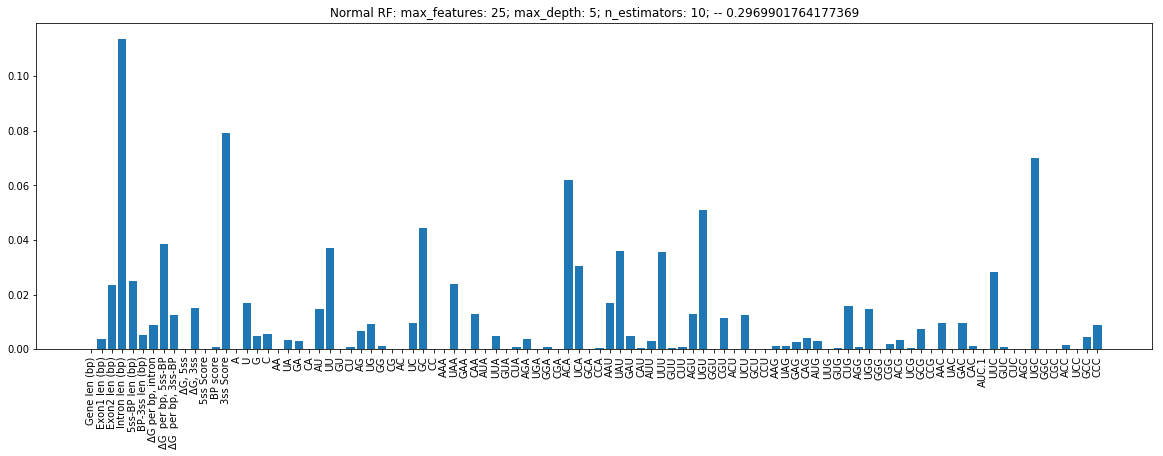

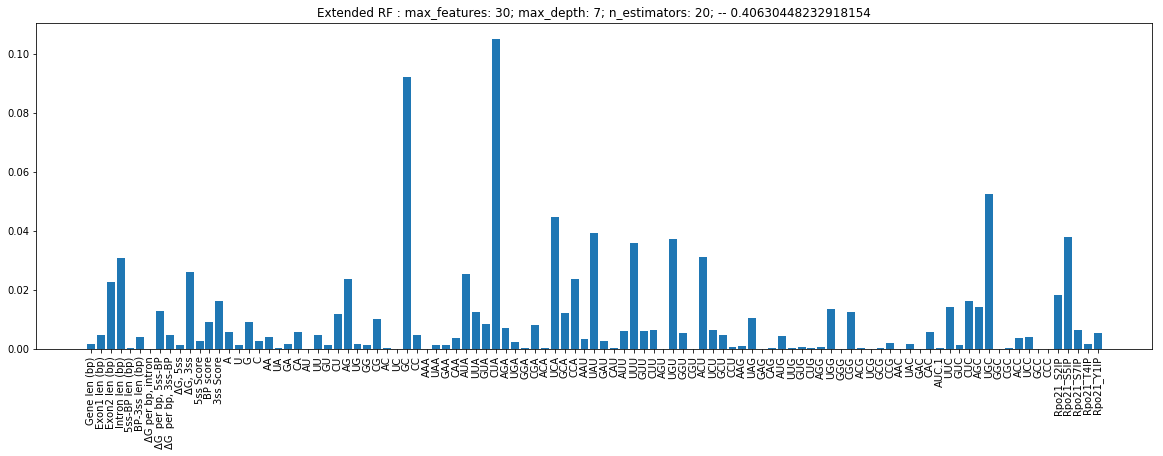

In [22]:
best_RFs(results_1_nrp,results_2_nrp,'nrp')

In [23]:
Normal best: 0.2969901764177368 | max_features: 25; max_depth: 5; n_estimators: 10;
Extended best: 0.40630448232918154 | max_features: 30; max_depth: 7; n_estimators: 20;
Best difference: 0.2582434619528223 | max_features: 30; max_depth: 7; n_estimators: 20;
Normal feature space
Coefficient of determination R^2: 0.2360352774266372
Mean squared error:               0.03984437679487179
Mean absolute error:              0.1488410256410256
Root mean squared error:          0.19961056283391365
Correlation Coefficient:          0.48848065665874996


Extended feature space
Coefficient of determination R^2: 0.38909635792549957
Mean squared error:               0.031861516874999996
Mean absolute error:              0.13109380341880345
Root mean squared error:          0.1784979464167585
Correlation Coefficient:          0.6250700537546936

SyntaxError: invalid syntax (<ipython-input-23-6872f7d45784>, line 1)